# <font color = "red">Project 1

## <font color = "blue"> Blue color is comment, <font color = 'Green'> Green color is conclusion

# Classification Part (Income classification)

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix

#model
from sklearn.metrics import confusion_matrix, roc_auc_score,precision_score, recall_score,accuracy_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import LinearSVC
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV


%matplotlib notebook
%matplotlib inline
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"
pd.options.mode.chained_assignment = None
#Visualization
import seaborn as sns
import matplotlib as mpl
import matplotlib.pylab as pylab
import matplotlib.pyplot as plt
import os
os.chdir("C:/Users/howar/Desktop/ML")

In [2]:
import numpy as np # linear algebra
from matplotlib import pyplot as plt
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from sklearn import model_selection # for splitting the data into training and testing data
import seaborn as sns
from sklearn.linear_model import LinearRegression 
from sklearn.model_selection import train_test_split

from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

## Description

Listing of attributes:

income:　>50K, <=50K.

age: continuous. 

workclass: Private, Self-emp-not-inc, Self-emp-inc, Federal-gov, Local-gov, State-gov, Without-pay, Never-worked. 

fnlwgt: final weight (continuous). 

education: Bachelors, Some-college, 11th, HS-grad, Prof-school, Assoc-acdm, Assoc-voc, 9th, 7th-8th, 12th, Masters, 1st-4th, 10th, Doctorate, 5th-6th, Preschool. 

education-num: number of years (continuous). 

marital-status: Married-civ-spouse, Divorced, Never-married, Separated, Widowed, Married-spouse-absent, Married-AF-spouse.

occupation: Tech-support, Craft-repair, Other-service, Sales, Exec-managerial, Prof-specialty, Handlers-cleaners, Machine-op-inspct, Adm-clerical, Farming-fishing, Transport-moving, Priv-house-serv, Protective-serv, Armed-Forces. 

relationship: Wife, Own-child, Husband, Not-in-family, Other-relative, Unmarried. 

race: White, Asian-Pac-Islander, Amer-Indian-Eskimo, Other, Black. 

sex: Female, Male. 

capital-gain: continuous. 

capital-loss: continuous. 

hours-per-week: work hour per weeks (continuous). 

native-country: United-States, Cambodia, England, Puerto-Rico, Canada, Germany, Outlying-US(Guam-USVI-etc), India, Japan, Greece, South, China, Cuba, Iran, Honduras, Philippines, Italy, Poland, Jamaica, Vietnam, Mexico, Portugal, Ireland, France, Dominican-Republic, Laos, Ecuador, Taiwan, Haiti, Columbia, Hungary, Guatemala, Nicaragua, Scotland, Thailand, Yugoslavia, El-Salvador, Trinadad&Tobago, Peru, Hong, Holand-Netherlands.

In [3]:
df = pd.read_csv('income.csv')

### <font color='blue'> We can see there are total 15 columns, 9 are categorical, 6 are numerical

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30224 entries, 0 to 30223
Data columns (total 15 columns):
age               27515 non-null float64
workclass         27511 non-null object
fnlwgt            27528 non-null float64
education         27537 non-null object
education-num     27498 non-null float64
marital-status    27517 non-null object
occupation        27546 non-null object
relationship      27450 non-null object
race              27460 non-null object
sex               27558 non-null object
capital-gain      27509 non-null float64
capital-loss      27489 non-null float64
hours-per-week    27493 non-null float64
native-country    27424 non-null object
income            27537 non-null object
dtypes: float64(6), object(9)
memory usage: 3.5+ MB


### <font color='blue'> Here are the columns with missing value

In [5]:
df.isnull().sum()

age               2709
workclass         2713
fnlwgt            2696
education         2687
education-num     2726
marital-status    2707
occupation        2678
relationship      2774
race              2764
sex               2666
capital-gain      2715
capital-loss      2735
hours-per-week    2731
native-country    2800
income            2687
dtype: int64

### <font color='blue'> Basic understanding of numerical variable

In [6]:
df.describe()

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week
count,27515.000000,2.752800e+04,27498.000000,27509.000000,27489.000000,27493.000000
mean,38.423514,1.900021e+05,10.125755,1074.957396,88.416567,40.909613
std,13.135963,1.058218e+05,2.547417,7284.630489,404.352368,11.937212
min,17.000000,1.376900e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.176150e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.785755e+05,10.000000,0.000000,0.000000,40.000000
75%,47.000000,2.377540e+05,13.000000,0.000000,0.000000,45.000000
max,90.000000,1.455435e+06,16.000000,99999.000000,4356.000000,99.000000


## Dealing with missing value

### <font color='blue'> Use median to fill continuous variables missing data

In [7]:
df.fillna({'age':37}, inplace=True)
df.isnull().sum()

age                  0
workclass         2713
fnlwgt            2696
education         2687
education-num     2726
marital-status    2707
occupation        2678
relationship      2774
race              2764
sex               2666
capital-gain      2715
capital-loss      2735
hours-per-week    2731
native-country    2800
income            2687
dtype: int64

In [8]:
df.fillna({'fnlwgt':1.785755e+05}, inplace=True)
df.isnull().sum()

age                  0
workclass         2713
fnlwgt               0
education         2687
education-num     2726
marital-status    2707
occupation        2678
relationship      2774
race              2764
sex               2666
capital-gain      2715
capital-loss      2735
hours-per-week    2731
native-country    2800
income            2687
dtype: int64

In [9]:
df.fillna({'education-num':10}, inplace=True)
df.isnull().sum()

age                  0
workclass         2713
fnlwgt               0
education         2687
education-num        0
marital-status    2707
occupation        2678
relationship      2774
race              2764
sex               2666
capital-gain      2715
capital-loss      2735
hours-per-week    2731
native-country    2800
income            2687
dtype: int64

In [10]:
df.fillna({'capital-gain':0}, inplace=True)
df.isnull().sum()

age                  0
workclass         2713
fnlwgt               0
education         2687
education-num        0
marital-status    2707
occupation        2678
relationship      2774
race              2764
sex               2666
capital-gain         0
capital-loss      2735
hours-per-week    2731
native-country    2800
income            2687
dtype: int64

In [11]:
df.fillna({'capital-loss':0}, inplace=True)
df.isnull().sum()

age                  0
workclass         2713
fnlwgt               0
education         2687
education-num        0
marital-status    2707
occupation        2678
relationship      2774
race              2764
sex               2666
capital-gain         0
capital-loss         0
hours-per-week    2731
native-country    2800
income            2687
dtype: int64

In [12]:
df.fillna({'hours-per-week':0}, inplace=True)
df.isnull().sum()

age                  0
workclass         2713
fnlwgt               0
education         2687
education-num        0
marital-status    2707
occupation        2678
relationship      2774
race              2764
sex               2666
capital-gain         0
capital-loss         0
hours-per-week       0
native-country    2800
income            2687
dtype: int64

### <font color='blue'> Basic understanding of categorical variable

In [13]:
df.describe(include = 'O')

,workclass,education,marital-status,occupation,relationship,race,sex,native-country,income
count,27511,27537,27517,27546,27450,27460,27558,27424,27537
unique,8,16,7,14,6,5,2,41,2
top,Private,HS-grad,Married-civ-spouse,Craft-repair,Husband,White,Male,United-States,<=50K
freq,20296,8983,12838,3690,11359,23580,18624,25001,20705


### <font color='blue'> Use mode to fill Na for categorical variable

In [14]:
for column in ['workclass', 'education', 'marital-status', 'occupation', 'relationship', 'race', 'sex', 'native-country', 'income']:
    df[column].fillna(df[column].mode()[0], inplace=True)

In [15]:
df.isnull().sum()

age               0
workclass         0
fnlwgt            0
education         0
education-num     0
marital-status    0
occupation        0
relationship      0
race              0
sex               0
capital-gain      0
capital-loss      0
hours-per-week    0
native-country    0
income            0
dtype: int64

## Data visulization and exploration

### <font color='blue'> randomly pick some categorical variable to see their distribution

Text(0.5, 1.0, 'Income Share')

Text(0.5, 1.0, 'income label')

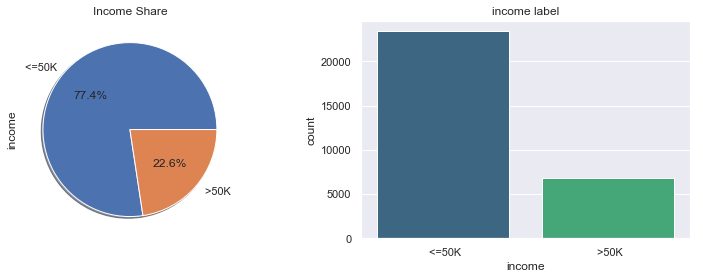

In [16]:
sns.set(font_scale=1)
f,ax=plt.subplots(1,2,figsize=(13,4))

ax[0] = df['income'].value_counts().plot.pie(explode=[0,0],autopct='%1.1f%%',ax=ax[0],shadow=True)
ax[0].set_title('Income Share')


#f, ax = plt.subplots(figsize=(6, 8))
ax[1] = sns.countplot(x="income", data=df, palette="viridis")
ax[1].set_title("income label")

### <font color='blue'> Most of samples are HS-grad

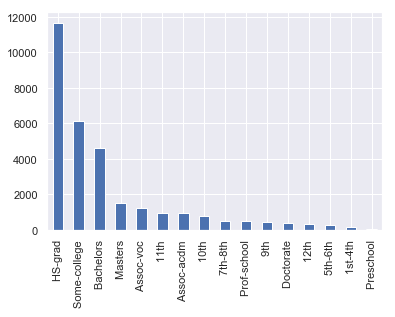

In [17]:
df['education'].value_counts().plot.bar()

### <font color='blue'> It's around 70% male and 30% female

Text(0.5, 1.0, 'Sex%')

Text(0.5, 1.0, 'Sex label')

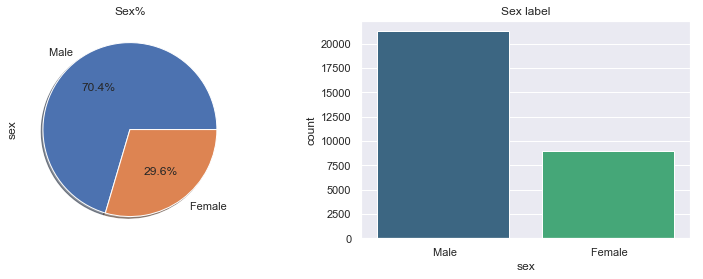

In [18]:
sns.set(font_scale=1)
f,ax=plt.subplots(1,2,figsize=(13,4))

ax[0] = df['sex'].value_counts().plot.pie(explode=[0,0],autopct='%1.1f%%',ax=ax[0],shadow=True)
ax[0].set_title('Sex%')


#f, ax = plt.subplots(figsize=(6, 8))
ax[1] = sns.countplot(x="sex", data=df, palette="viridis")
ax[1].set_title("Sex label")

### <font color='blue'> The most frequent occupation is Craft-repair

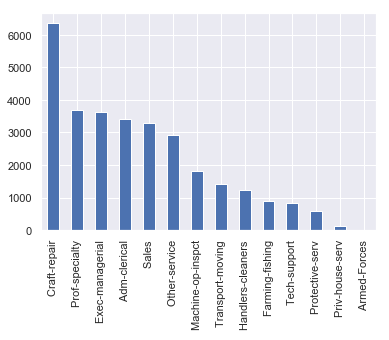

In [19]:
df['occupation'].value_counts().plot.bar()

### <font color='blue'> most the race are white

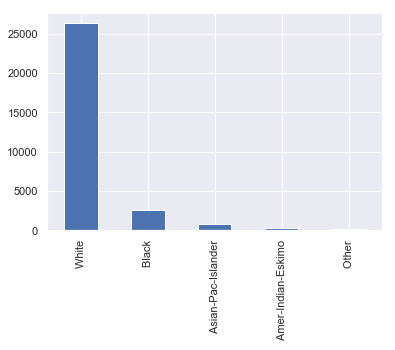

In [20]:
df['race'].value_counts().plot.bar()

### <font color='blue'> Let's see some continuous variable with our target

### <font color='blue'> The median age of people whose income >50k is higher than age 40

<Figure size 720x720 with 0 Axes>

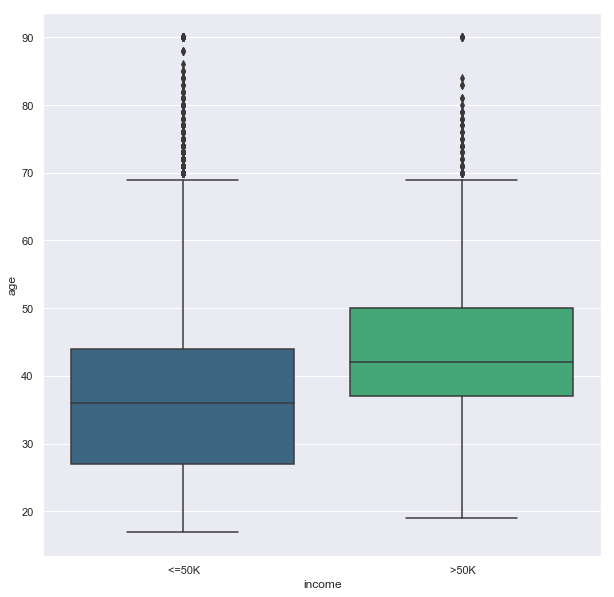

In [21]:
plt.figure(figsize=(10,10))
ax = sns.boxplot(data=df, x='income',y=df['age'],palette='viridis')

### <font color='blue'> Most of people whose income >50k have spend more years on education

<Figure size 720x720 with 0 Axes>

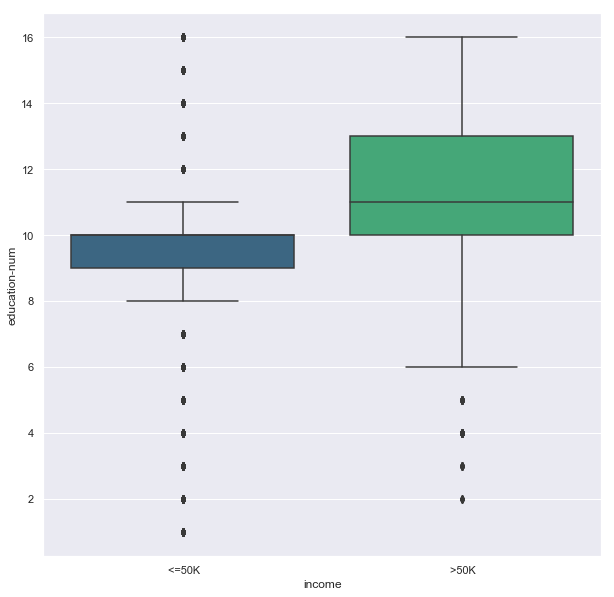

In [22]:
plt.figure(figsize=(10,10))
ax = sns.boxplot(data=df, x='income',y=df['education-num'],palette='viridis')

### <font color='blue'> This variable is very close to zero for both label, I think this veriable is not important, maybe should drp it.

<Figure size 720x720 with 0 Axes>

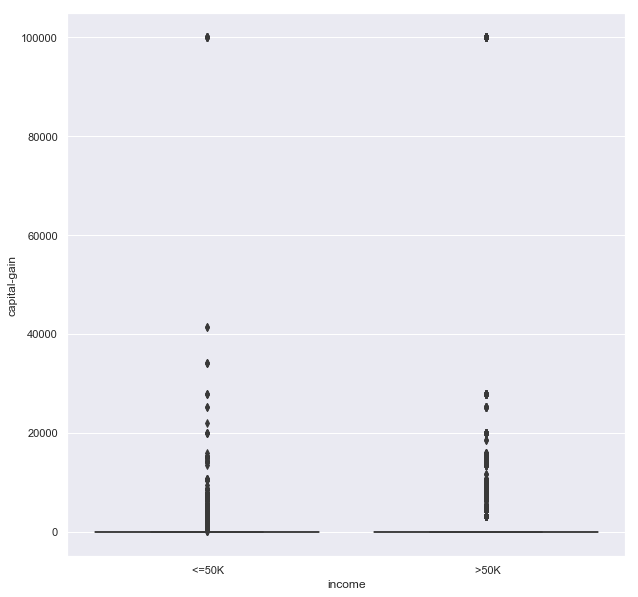

In [23]:
plt.figure(figsize=(10,10))
ax = sns.boxplot(data=df, x='income',y=df['capital-gain'],palette='viridis')

### <font color='blue'> This variable is very close to zero for both label, I think this veriable is not important, maybe should drp it.

<Figure size 720x720 with 0 Axes>

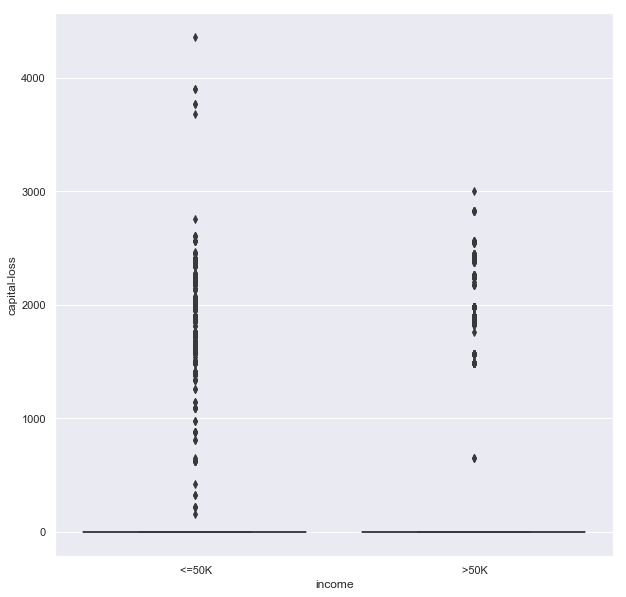

In [24]:
plt.figure(figsize=(10,10))
ax = sns.boxplot(data=df, x='income',y=df['capital-loss'],palette='viridis')

### <font color='blue'> people whoes income >50k work more hours than people whoes <=50k.

<Figure size 720x720 with 0 Axes>

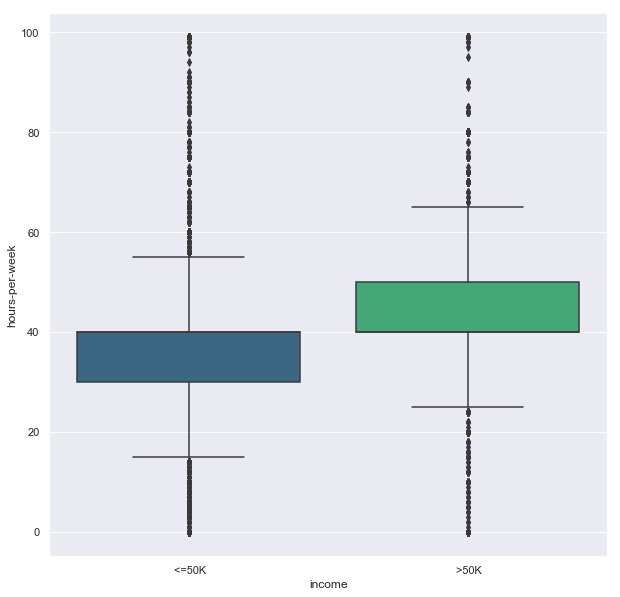

In [25]:
plt.figure(figsize=(10,10))
ax = sns.boxplot(data=df, x='income',y=df['hours-per-week'],palette='viridis')

### <font color='blue'> Final weight is not very different between 2 labels, but the outlier of people <= 50k are higher.

<Figure size 720x720 with 0 Axes>

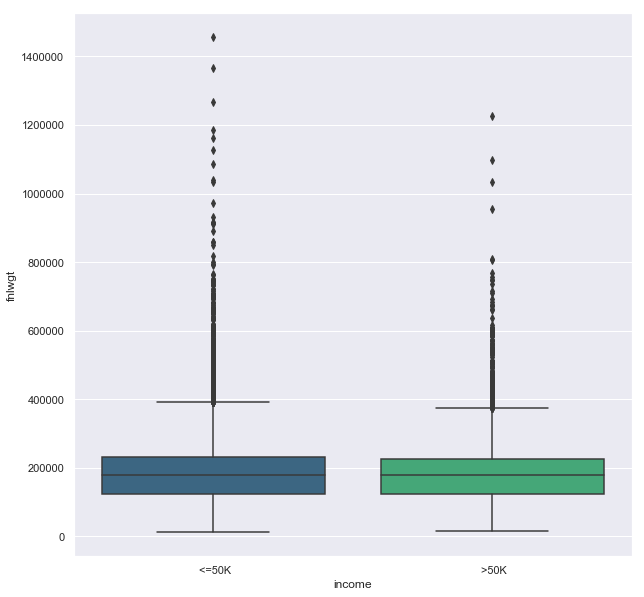

In [26]:
plt.figure(figsize=(10,10))
ax = sns.boxplot(data=df, x='income',y=df['fnlwgt'],palette='viridis')

### <font color='blue'> We can see that only Masters, Doctorate, Prof-school have more people earn more than 50k, 
other categorical have more people whose income are lower than 50k.

<Figure size 2232x1008 with 0 Axes>

{'font.size': 20.4,
 'axes.labelsize': 20.4,
 'axes.titlesize': 20.4,
 'xtick.labelsize': 18.7,
 'ytick.labelsize': 18.7,
 'legend.fontsize': 18.7,
 'axes.linewidth': 1.25,
 'grid.linewidth': 1.0,
 'lines.linewidth': 1.5,
 'lines.markersize': 6.0,
 'patch.linewidth': 1.0,
 'xtick.major.width': 1.25,
 'ytick.major.width': 1.25,
 'xtick.minor.width': 1.0,
 'ytick.minor.width': 1.0,
 'xtick.major.size': 6.0,
 'ytick.major.size': 6.0,
 'xtick.minor.size': 4.0,
 'ytick.minor.size': 4.0}

Text(0.5, 1.0, 'Income with education')

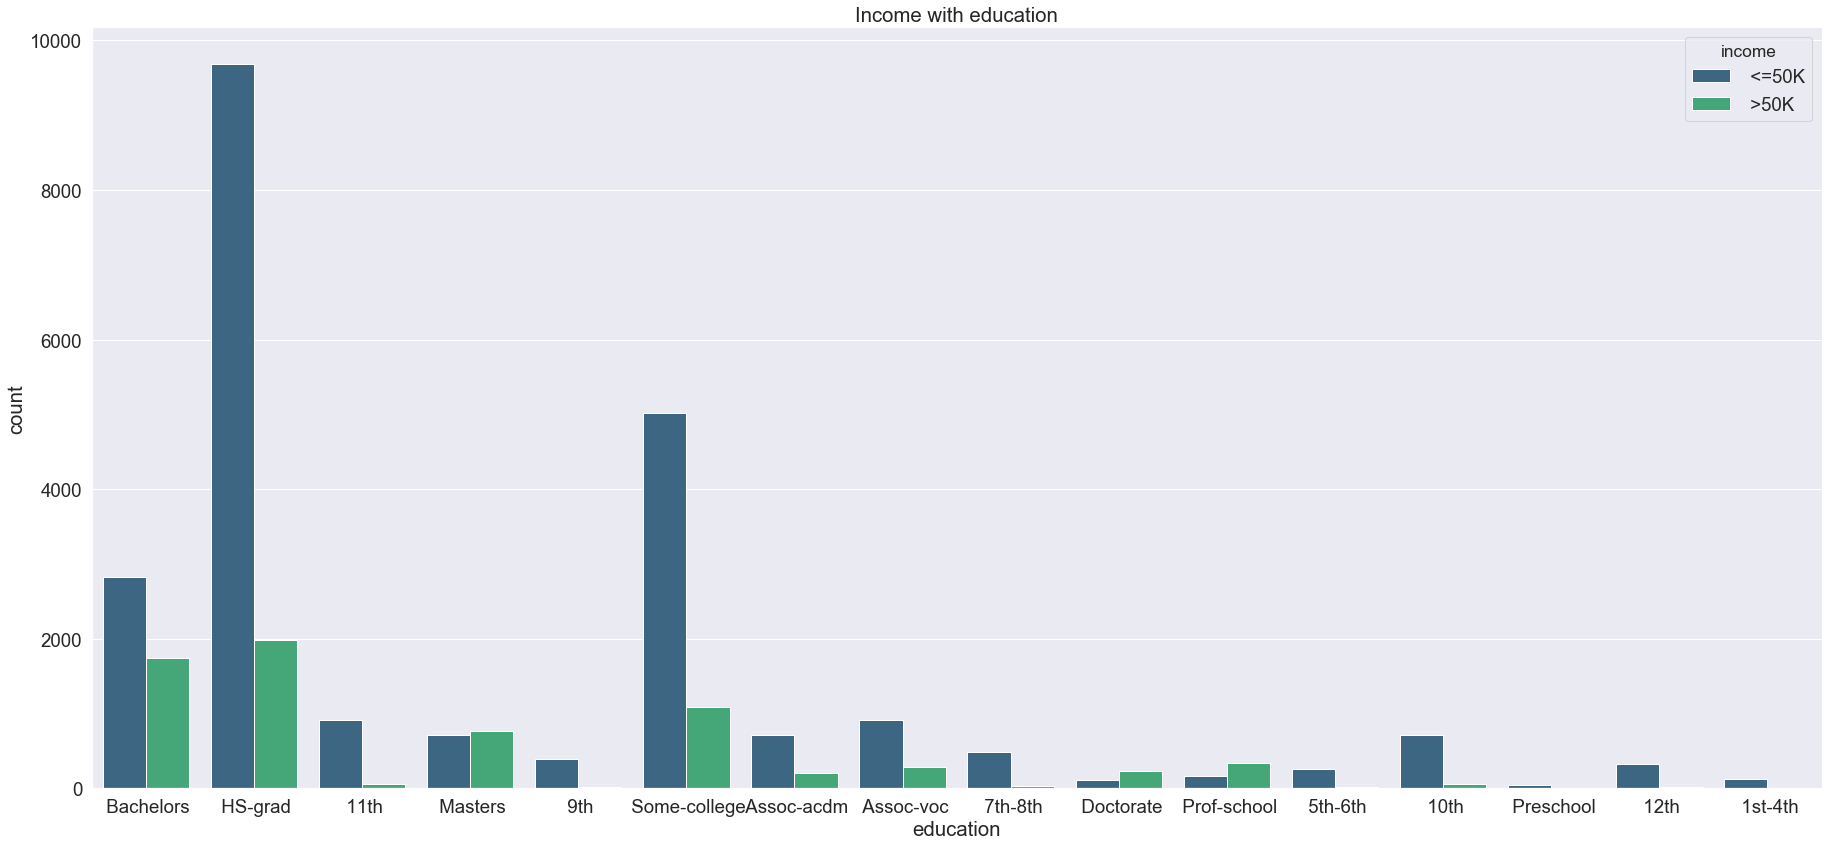

In [27]:
sns.set(font_scale=1.7)
plt.figure(figsize=(31,14))
ax = sns.countplot(x='education',hue='income', data=df, palette="viridis")
sns.plotting_context(font_scale=1.5)
ax.set_title("Income with education")

### <font color='blue'> We can see there is signigicantly more people who never-married in income <=50k label than in income >50k label.

Text(0.5, 1.0, 'Income for marital-status')

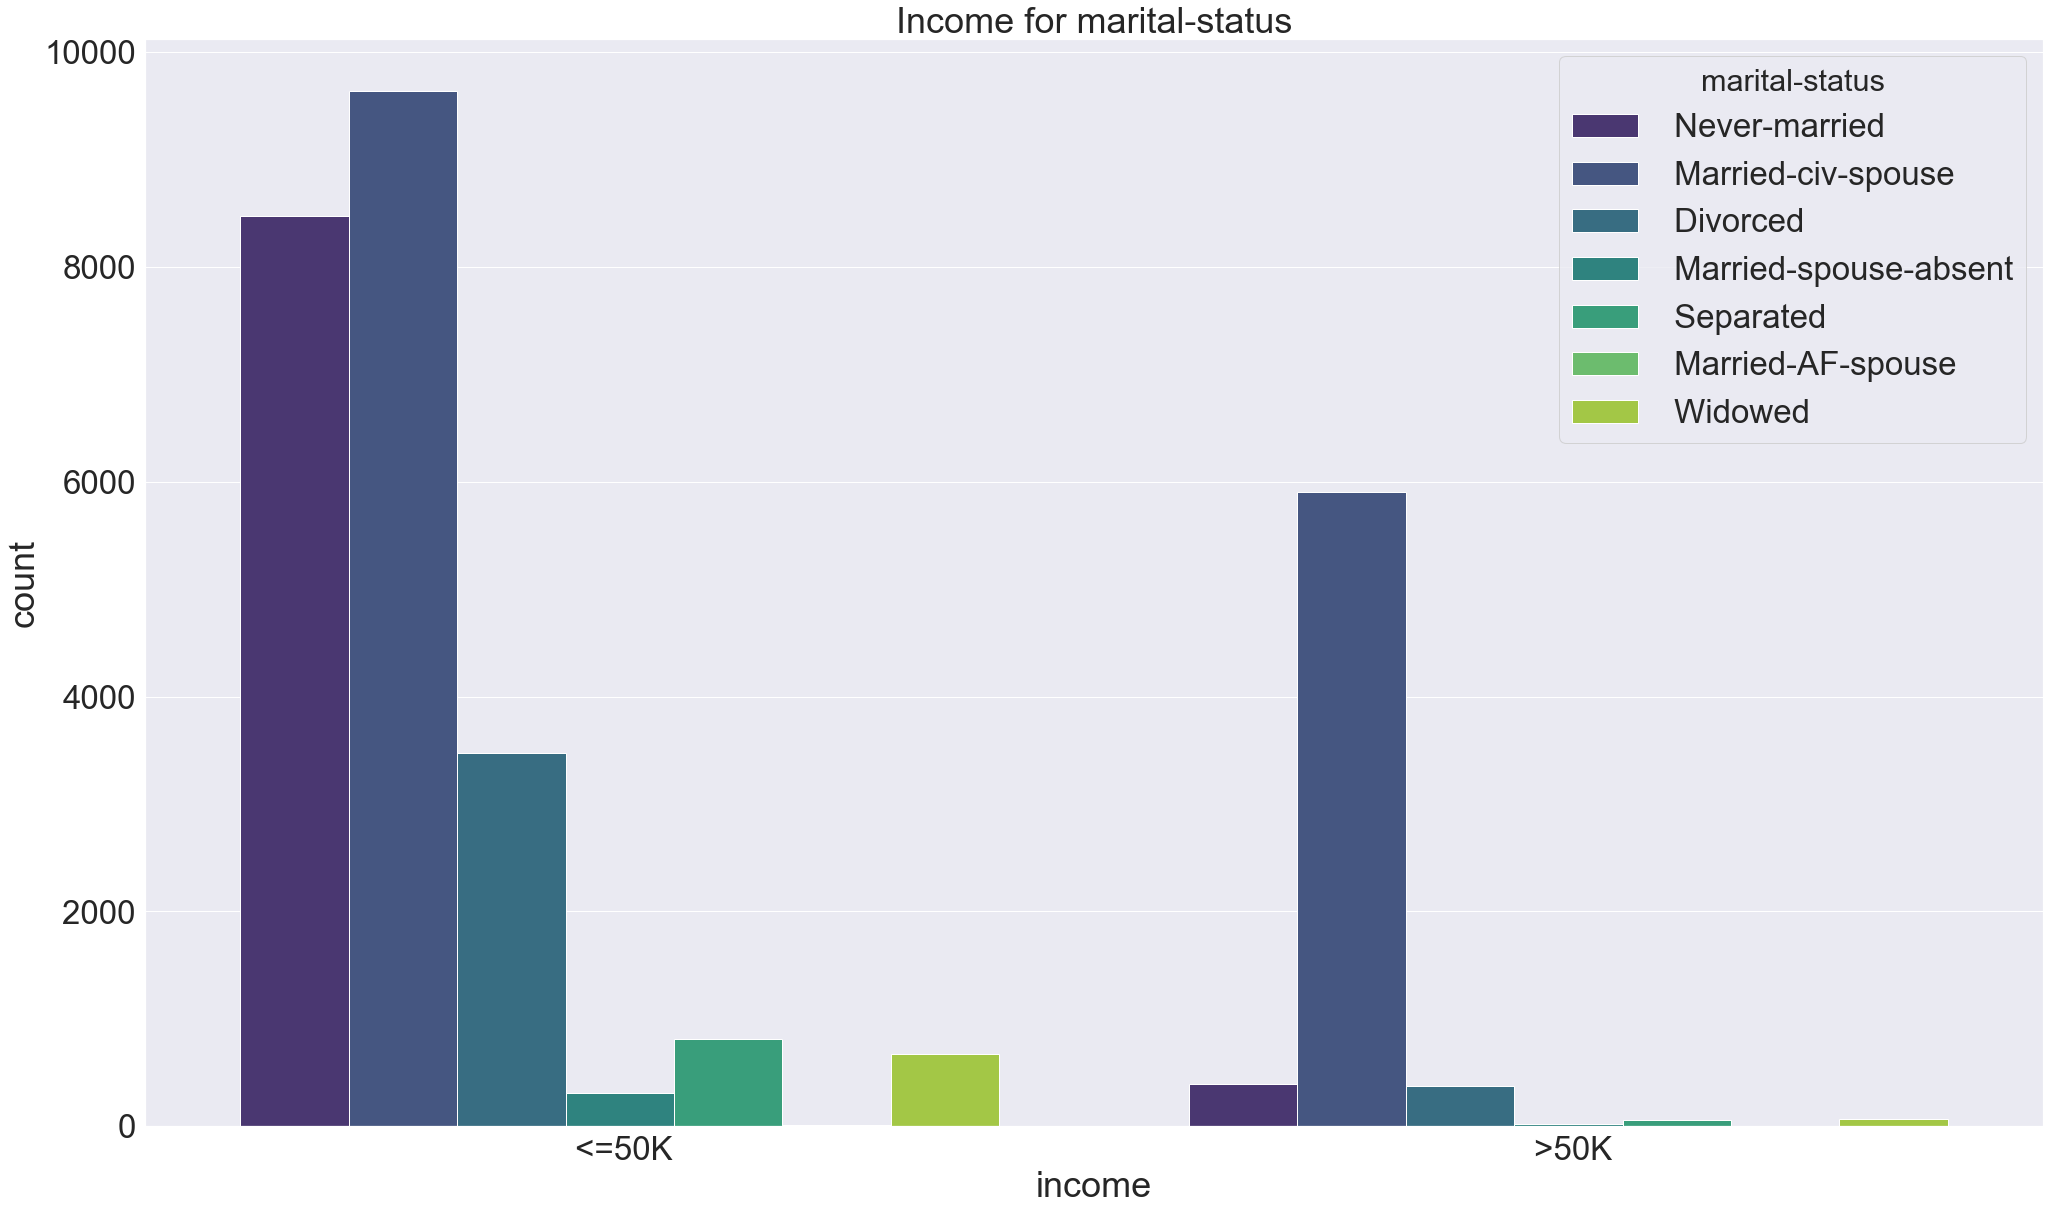

In [28]:
sns.set(font_scale=3)
f, ax = plt.subplots(figsize=(34, 20))
ax = sns.countplot(x="income", hue="marital-status", data=df, palette="viridis")
ax.set_title("Income for marital-status")

### <font color='blue'> It looks like female are more likely to have income <=50k

<Figure size 2232x1008 with 0 Axes>

{'font.size': 36.0,
 'axes.labelsize': 36.0,
 'axes.titlesize': 36.0,
 'xtick.labelsize': 33.0,
 'ytick.labelsize': 33.0,
 'legend.fontsize': 33.0,
 'axes.linewidth': 1.25,
 'grid.linewidth': 1.0,
 'lines.linewidth': 1.5,
 'lines.markersize': 6.0,
 'patch.linewidth': 1.0,
 'xtick.major.width': 1.25,
 'ytick.major.width': 1.25,
 'xtick.minor.width': 1.0,
 'ytick.minor.width': 1.0,
 'xtick.major.size': 6.0,
 'ytick.major.size': 6.0,
 'xtick.minor.size': 4.0,
 'ytick.minor.size': 4.0}

Text(0.5, 1.0, 'Income with sex')

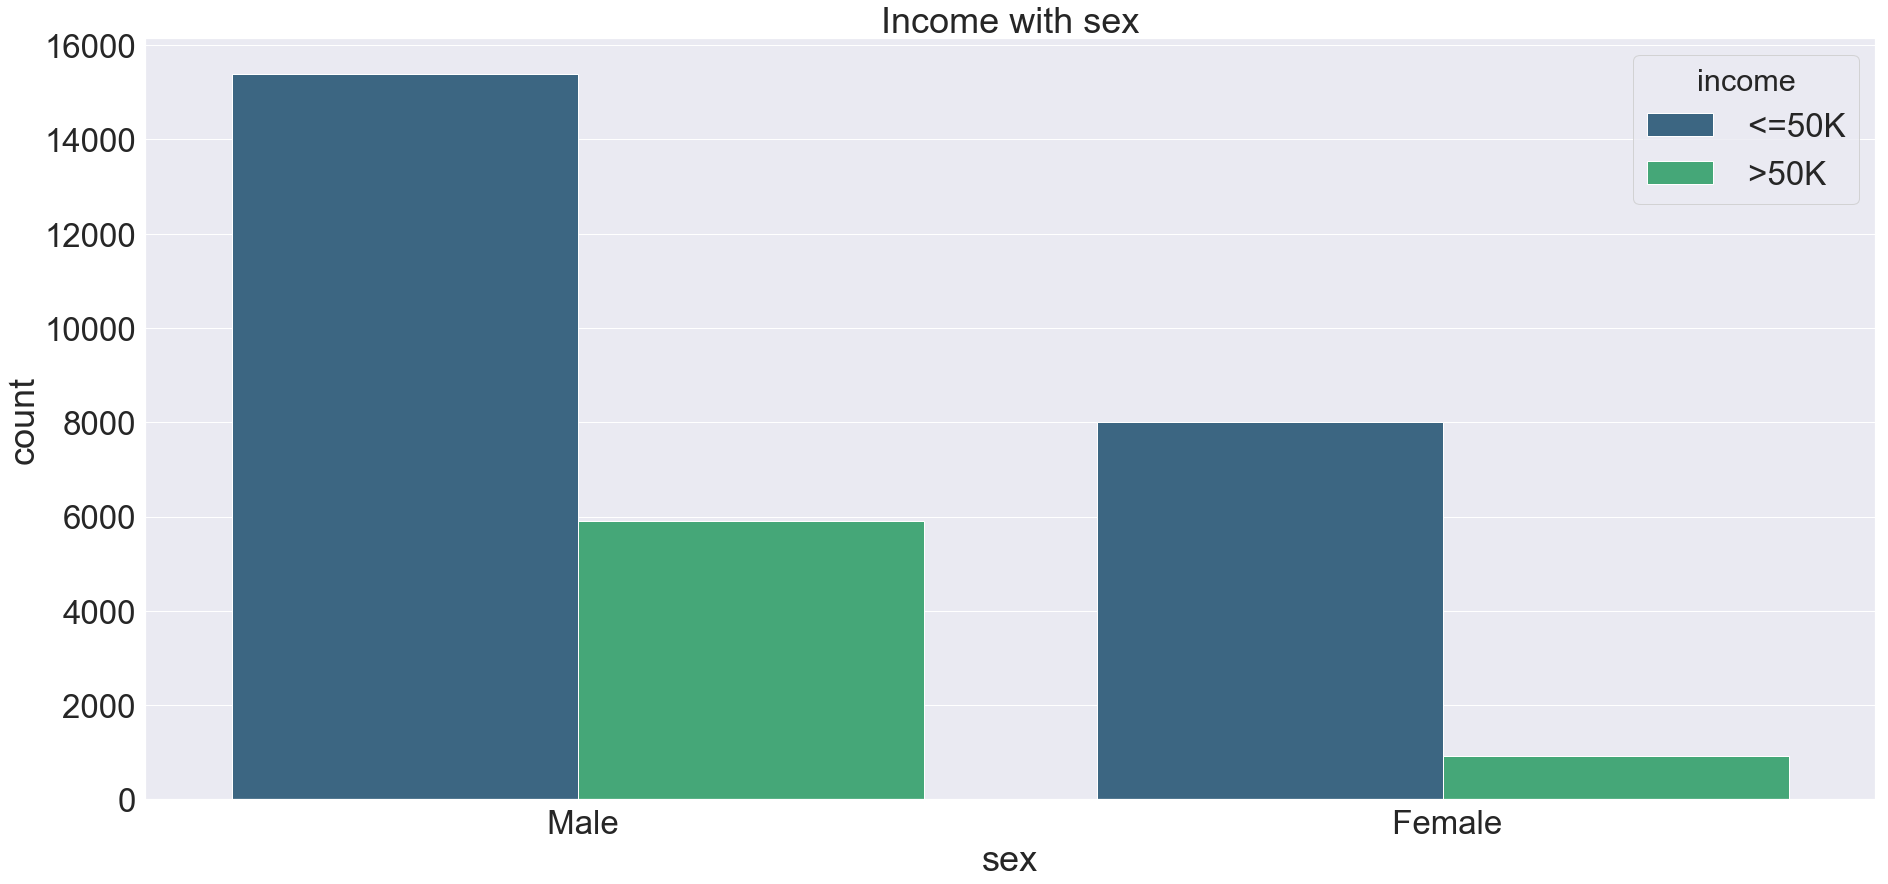

In [29]:
sns.set(font_scale=3)
plt.figure(figsize=(31,14))
ax = sns.countplot(x='sex',hue='income', data=df, palette="viridis")
sns.plotting_context(font_scale=1.5)
ax.set_title("Income with sex")

### <font color='blue'>It looks like white people are more likely to have income >50k.

<Figure size 2232x1008 with 0 Axes>

{'font.size': 36.0,
 'axes.labelsize': 36.0,
 'axes.titlesize': 36.0,
 'xtick.labelsize': 33.0,
 'ytick.labelsize': 33.0,
 'legend.fontsize': 33.0,
 'axes.linewidth': 1.25,
 'grid.linewidth': 1.0,
 'lines.linewidth': 1.5,
 'lines.markersize': 6.0,
 'patch.linewidth': 1.0,
 'xtick.major.width': 1.25,
 'ytick.major.width': 1.25,
 'xtick.minor.width': 1.0,
 'ytick.minor.width': 1.0,
 'xtick.major.size': 6.0,
 'ytick.major.size': 6.0,
 'xtick.minor.size': 4.0,
 'ytick.minor.size': 4.0}

Text(0.5, 1.0, 'Income with race')

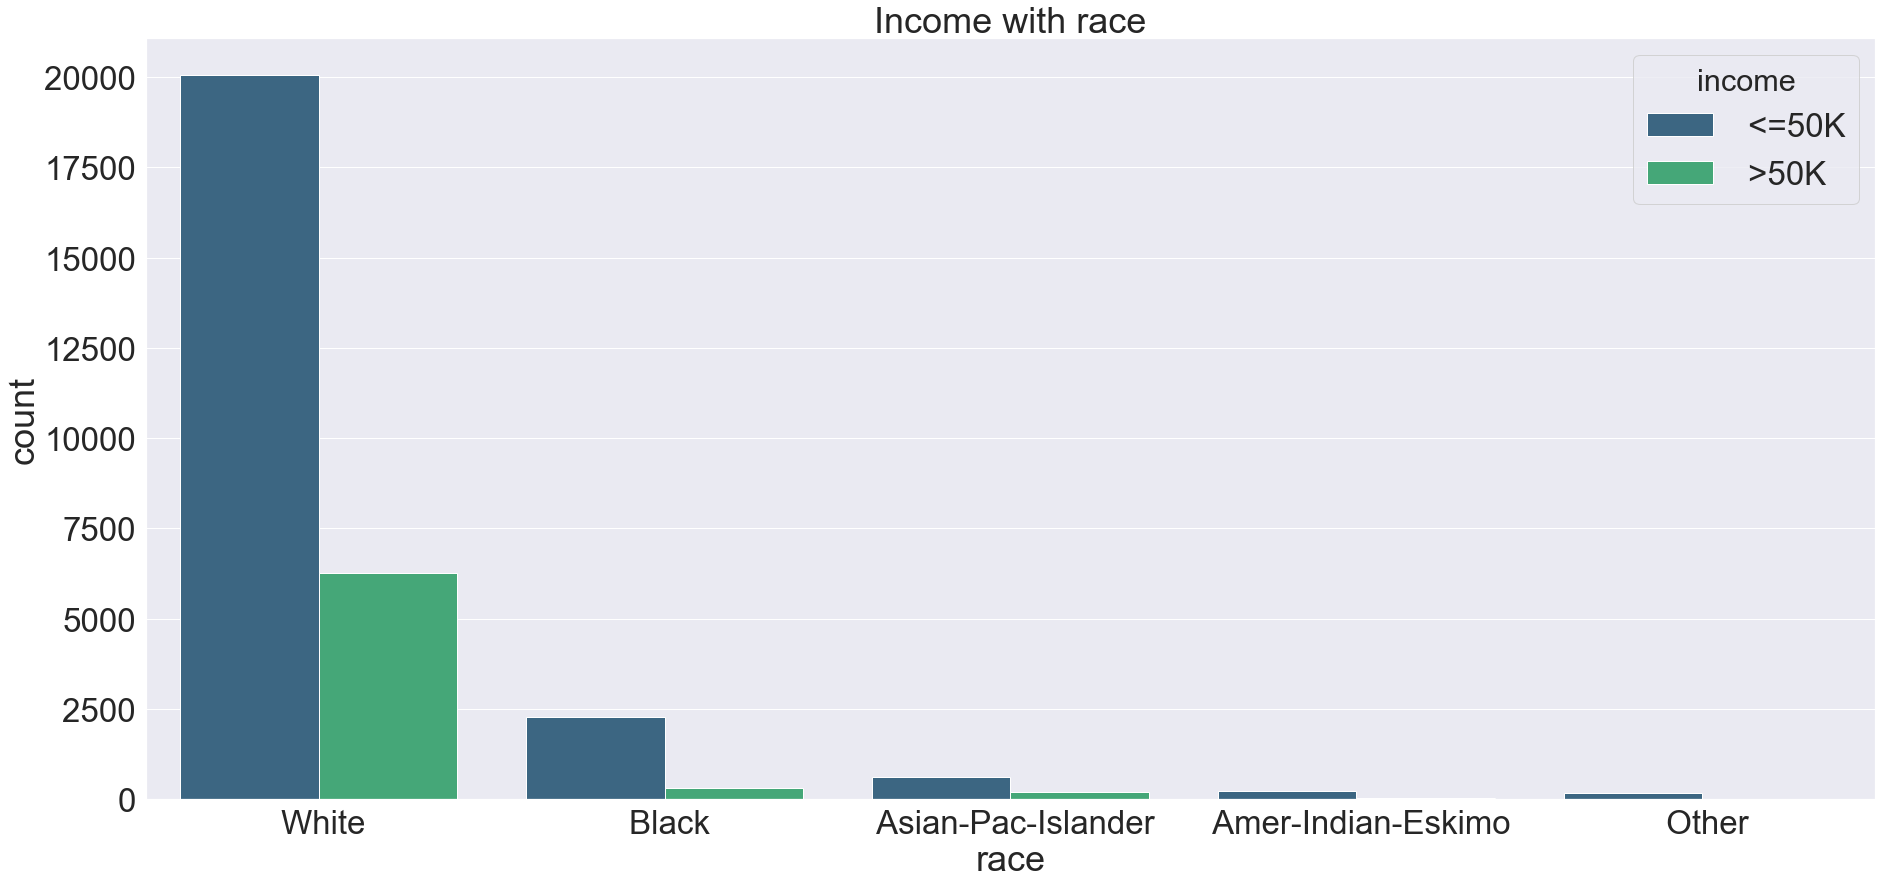

In [30]:
sns.set(font_scale=3)
plt.figure(figsize=(31,14))
ax = sns.countplot(x='race',hue='income', data=df, palette="viridis")
sns.plotting_context(font_scale=1.5)
ax.set_title("Income with race")

## Data transformation

### <font color='blue'> Trans form all the categorical variable

In [31]:
categorical = []
for i in df.columns:
    if df[i].dtype=='O':
        categorical.append(i)
print(categorical)

['workclass', 'education', 'marital-status', 'occupation', 'relationship', 'race', 'sex', 'native-country', 'income']


In [32]:
workclass_dummy=pd.get_dummies(df['workclass'],columns='workclass',prefix='workclass') 
df=pd.concat([df, workclass_dummy], axis=1)
df.drop(['workclass'], axis=1,inplace=True)

education_dummy=pd.get_dummies(df['education'],columns='education',prefix='education') 
df=pd.concat([df, education_dummy], axis=1)
df.drop(['education'], axis=1,inplace=True)

marital_dummy=pd.get_dummies(df['marital-status'],columns='marital-status',prefix='marital-status') 
df=pd.concat([df, marital_dummy], axis=1)
df.drop(['marital-status'], axis=1,inplace=True)

occupation_dummy=pd.get_dummies(df['occupation'],columns='occupation',prefix='occupation') 
df=pd.concat([df, occupation_dummy], axis=1)
df.drop(['occupation'], axis=1,inplace=True)

relationship_dummy=pd.get_dummies(df['relationship'],columns='relationship',prefix='relationship') 
df=pd.concat([df, relationship_dummy], axis=1)
df.drop(['relationship'], axis=1,inplace=True)

race_dummy=pd.get_dummies(df['race'],columns='race',prefix='race') 
df=pd.concat([df, race_dummy], axis=1)
df.drop(['race'], axis=1,inplace=True)

country_dummy=pd.get_dummies(df['native-country'],columns='native-country',prefix='native-country') 
df=pd.concat([df, country_dummy], axis=1)
df.drop(['native-country'], axis=1,inplace=True)

df['sex'] = df['sex'].map({' Male':1, ' Female':0}).astype(int)
df['income'] = df['income'].map({' <=50K':0, ' >50K':1})

### <font color = 'blue'>Now we have 105 columns

In [33]:
df.shape

(30224, 105)

## Train_Test_Split & Scale variable

In [34]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [35]:
np.random.seed(123)
Y  = df["income"]
X =  df.drop("income",axis=1)
X_train_org, X_test_org, y_train, y_test = train_test_split(X, Y, random_state = 0)

### <font color = 'blue'> Using standardscaler to scale the data

In [36]:
ss = StandardScaler()
X_train = ss.fit_transform(X_train_org)
X_test = ss.transform(X_test_org)

## Without CV part

## KNN

In [37]:
from sklearn.neighbors import KNeighborsClassifier

train_score_array = []
test_score_array = []

for k in range(1,20):
    knn = KNeighborsClassifier(k)
    knn.fit(X_train, y_train)
    train_score_array.append(knn.score(X_train, y_train))
    test_score_array.append(knn.score(X_test, y_test))

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=1, p=2,
                     weights='uniform')

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=2, p=2,
                     weights='uniform')

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=3, p=2,
                     weights='uniform')

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=4, p=2,
                     weights='uniform')

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=6, p=2,
                     weights='uniform')

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=7, p=2,
                     weights='uniform')

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=8, p=2,
                     weights='uniform')

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=9, p=2,
                     weights='uniform')

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=10, p=2,
                     weights='uniform')

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=11, p=2,
                     weights='uniform')

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=12, p=2,
                     weights='uniform')

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=13, p=2,
                     weights='uniform')

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=14, p=2,
                     weights='uniform')

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=15, p=2,
                     weights='uniform')

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=16, p=2,
                     weights='uniform')

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=17, p=2,
                     weights='uniform')

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=18, p=2,
                     weights='uniform')

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=19, p=2,
                     weights='uniform')

Text(0.5, 0, 'k')

Text(0, 0.5, 'Accuracy')

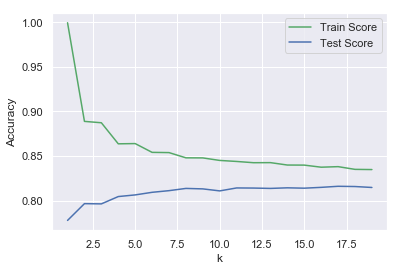

In [38]:
sns.set(font_scale = 1)
x_axis = range(1,20)
%matplotlib inline
plt.plot(x_axis, train_score_array, label = 'Train Score', c = 'g')
plt.plot(x_axis, test_score_array, label = 'Test Score', c='b')
plt.xlabel('k')
plt.ylabel('Accuracy')
plt.legend()


### <font color = 'blue'> From the graph above we can see the train and test scores changing along the k increaseing

### <font color = "blue">From the graph we think that k = 10 might be the best option. 
    
### <font color = 'blue'> train score:0.8452, test score: 0.8110

In [39]:
knn = KNeighborsClassifier(10)
knn.fit(X_train, y_train)
print('Train score: {:.4f}'.format(knn.score(X_train, y_train)))
print('Test score: {:.4f}'.format(knn.score(X_test, y_test)))

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=10, p=2,
                     weights='uniform')

Train score: 0.8452
Test score: 0.8110


## Logistic Regression

In [40]:
c_range = [0.001, 0.01, 0.1, 1, 10, 100, 1000]
train_score_l1 = []
train_score_l2 = []
test_score_l1 = []
test_score_l2 = []

for c in c_range:
    log_l1 = LogisticRegression(penalty = 'l1', C = c)
    log_l2 = LogisticRegression(penalty = 'l2', C = c)
    log_l1.fit(X_train, y_train)
    log_l2.fit(X_train, y_train)
    train_score_l1.append(log_l1.score(X_train, y_train))
    train_score_l2.append(log_l2.score(X_train, y_train))
    test_score_l1.append(log_l1.score(X_test, y_test))
    test_score_l2.append(log_l2.score(X_test, y_test))

C:\Users\howar\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=0.001, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l1',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

C:\Users\howar\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=0.001, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

C:\Users\howar\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=0.01, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l1',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

C:\Users\howar\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=0.01, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

C:\Users\howar\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=0.1, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l1',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

C:\Users\howar\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=0.1, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

C:\Users\howar\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l1',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

C:\Users\howar\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

C:\Users\howar\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=10, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l1',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

C:\Users\howar\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=10, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

C:\Users\howar\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=100, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l1',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

C:\Users\howar\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=100, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

C:\Users\howar\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1000, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l1',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

C:\Users\howar\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1000, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

Text(0.5, 0, 'Regularization parameter: C')

Text(0, 0.5, 'Accuracy')

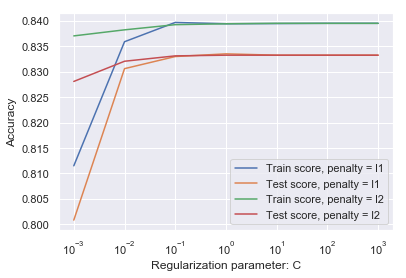

In [41]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.plot(c_range, train_score_l1, label = 'Train score, penalty = l1')
plt.plot(c_range, test_score_l1, label = 'Test score, penalty = l1')
plt.plot(c_range, train_score_l2, label = 'Train score, penalty = l2')
plt.plot(c_range, test_score_l2, label = 'Test score, penalty = l2')
plt.legend()
plt.xlabel('Regularization parameter: C')
plt.ylabel('Accuracy')
plt.xscale('log')

### <font color = 'blue'>From the graph we can see that when C above 0.1, both l1 and l2 have the best train and test scores.

In [42]:
lreg = LogisticRegression()
lreg.fit(X_train, y_train)
print('Train score: {:.4f}'.format(lreg.score(X_train, y_train)))
print('Train score: {:.4f}'.format(lreg.score(X_test, y_test)))

C:\Users\howar\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

Train score: 0.8394
Train score: 0.8332


## Linear SVC

In [43]:
%matplotlib inline

from mlxtend.plotting import plot_decision_regions
from sklearn.svm import LinearSVC, SVC

In [44]:
clf = LinearSVC()

clf.fit(X_train,y_train)
print('Train score: {:.4f}'.format(clf.score(X_train, y_train)))
print('Test score: {:.4f}'.format(clf.score(X_test, y_test)))

C:\Users\howar\Anaconda3\lib\site-packages\sklearn\svm\base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


LinearSVC(C=1.0, class_weight=None, dual=True, fit_intercept=True,
          intercept_scaling=1, loss='squared_hinge', max_iter=1000,
          multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
          verbose=0)

Train score: 0.8346
Test score: 0.8265


### <font color = "blue"> Linear SVC train score: 0.8346, test score: 0.8265

## SVC with kernel

In [47]:
from matplotlib import gridspec
import itertools

In [49]:
clf1 = SVC(kernel='rbf', gamma=0.01, C=0.01)
clf2 = SVC(kernel='rbf', gamma=0.1, C=0.1)
clf3 = SVC(kernel='rbf', gamma=1, C=1)
clf4 = SVC(kernel='rbf', gamma=10, C=10)
clf1.fit(X_train,y_train)
clf2.fit(X_train,y_train)
clf3.fit(X_train,y_train)
clf4.fit(X_train,y_train)
print('Train score: {:.4f}'.format(clf1.score(X_train, y_train)))
print('Test score: {:.4f}'.format(clf1.score(X_test, y_test)))

print('Train score: {:.4f}'.format(clf2.score(X_train, y_train)))
print('Test score: {:.4f}'.format(clf2.score(X_test, y_test)))

print('Train score: {:.4f}'.format(clf3.score(X_train, y_train)))
print('Test score: {:.4f}'.format(clf3.score(X_test, y_test)))

print('Train score: {:.4f}'.format(clf4.score(X_train, y_train)))
print('Test score: {:.4f}'.format(clf4.score(X_test, y_test)))

SVC(C=0.01, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=0.01, kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

SVC(C=0.1, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=0.1, kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

SVC(C=1, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=1, kernel='rbf', max_iter=-1,
    probability=False, random_state=None, shrinking=True, tol=0.001,
    verbose=False)

SVC(C=10, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=10, kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

Train score: 0.7755
Test score: 0.7695
Train score: 0.8029
Test score: 0.7958
Train score: 0.9367
Test score: 0.7962
Train score: 0.9938
Test score: 0.7746


### <font color = "blue"> SVC rbf: c = 0.01, gamma = 0.01; train score: 0.7755, test score: 0.7695
### <font color = "blue"> SVC rbf: c = 0.01, gamma = 0.01; train score: 0.8029, test score: 0.7958
### <font color = "blue"> SVC rbf: c = 0.01, gamma = 0.01; train score: 0.9367, test score: 0.7962
### <font color = "blue"> SVC rbf: c = 0.01, gamma = 0.01; train score: 0.9938, test score: 0.7746
### <font color = "blue"> The best of for is  c = 0.01, gamma = 0.01 because it has both highest train score: 0.9367, test score: 0.7962

## Decision Tree (using none scale)

In [50]:
from sklearn import tree

ditree = tree.DecisionTreeClassifier()
ditree = ditree.fit(X_train_org, y_train)

[Text(169.45593795132993, 215.34923076923076, 'X[33] <= 0.5\nentropy = 0.348\nsamples = 22668\nvalue = [17578, 5090]'),
 Text(65.26416039553764, 211.1676923076923, 'X[4] <= 7139.5\nentropy = 0.117\nsamples = 11011\nvalue = [10323, 688]'),
 Text(47.70617928254135, 206.98615384615385, 'X[2] <= 12.5\nentropy = 0.093\nsamples = 10824\nvalue = [10294, 530]'),
 Text(36.19334843944472, 202.80461538461537, 'X[5] <= 2391.5\nentropy = 0.053\nsamples = 8781\nvalue = [8542, 239]'),
 Text(28.25181358528372, 198.62307692307692, 'X[6] <= 40.5\nentropy = 0.05\nsamples = 8759\nvalue = [8534, 225]'),
 Text(21.499327202863753, 194.44153846153847, 'X[57] <= 0.5\nentropy = 0.032\nsamples = 7274\nvalue = [7156, 118]'),
 Text(18.082832230853377, 190.26, 'X[4] <= 4718.5\nentropy = 0.031\nsamples = 7271\nvalue = [7155, 116]'),
 Text(11.676932533915547, 186.07846153846154, 'X[0] <= 32.5\nentropy = 0.03\nsamples = 7242\nvalue = [7132, 110]'),
 Text(3.4500884022167466, 181.8969230769231, 'X[5] <= 2218.0\nentropy 

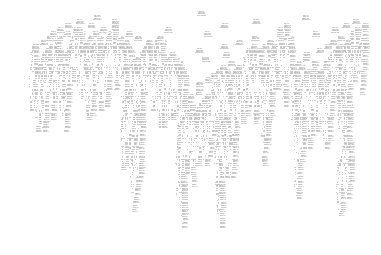

In [51]:
tree.plot_tree(ditree.fit(X_train_org, y_train)) 

In [52]:
print('Train score: {:.4f}'.format(ditree.score(X_train_org, y_train)))
print('Test score: {:.4f}'.format(ditree.score(X_test_org, y_test)))

Train score: 0.9995
Test score: 0.7965


### <font color = "blue"> The train score = 0.9995, the train score = 0.7965

# Cross Validation part

## Logistic Regression

In [53]:
from sklearn.model_selection import cross_val_score

In [54]:
logreg = LogisticRegression()

scores = cross_val_score(logreg, X_train, y_train)
print("Cross-validation train scores: {}".format(scores))
scores = cross_val_score(logreg, X_test, y_test)
print("Cross-validation test scores: {}".format(scores))

C:\Users\howar\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)
C:\Users\howar\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\howar\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\howar\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Cross-validation train scores: [0.83895726 0.83245103 0.84315023]


C:\Users\howar\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)
C:\Users\howar\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\howar\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\howar\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Cross-validation test scores: [0.82651846 0.82215165 0.83320095]


### CV = 5

In [55]:
scores = cross_val_score(logreg, X_train, y_train, cv=5)
print("Cross-validation scores train: {}".format(scores))
scores = cross_val_score(logreg, X_test, y_test, cv=5)
print("Cross-validation scores test: {}".format(scores))

C:\Users\howar\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\howar\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\howar\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\howar\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\howar\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence t

Cross-validation scores train: [0.84097927 0.83348037 0.83524482 0.8365321  0.84447386]


C:\Users\howar\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\howar\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\howar\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\howar\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\howar\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence t

Cross-validation scores test: [0.83796296 0.81481481 0.82395764 0.8464593  0.83046358]


In [56]:
scores = cross_val_score(logreg, X_train, y_train, cv=5)
print("Average cross-validation train score: {:.2f}".format(scores.mean()))
scores = cross_val_score(logreg, X_test, y_test, cv=5)
print("Average cross-validation test score: {:.2f}".format(scores.mean()))

C:\Users\howar\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\howar\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\howar\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\howar\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\howar\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence t

Average cross-validation train score: 0.84


C:\Users\howar\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\howar\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\howar\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\howar\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\howar\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence t

Average cross-validation test score: 0.83


### <font color = "blue"> The 5 fold cv logistic regression has the average train score: 0.84, test score = 0.83

## Grid Search with Cross-Validation  --- KNN

### Result With CV = 5

In [57]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier()
param_grid = {'n_neighbors':[10, 15, 20, 25]}

grid_knn = GridSearchCV(knn, param_grid=param_grid, cv = 5, scoring='roc_auc')
grid_knn.fit(X_train, y_train)

print('The best parameter: {}'.format(grid_knn.best_params_))
print('The best score: {:.4f}'.format(grid_knn.best_score_))

GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30,
                                            metric='minkowski',
                                            metric_params=None, n_jobs=None,
                                            n_neighbors=5, p=2,
                                            weights='uniform'),
             iid='warn', n_jobs=None,
             param_grid={'n_neighbors': [10, 15, 20, 25]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='roc_auc', verbose=0)

The best parameter: {'n_neighbors': 25}
The best score: 0.8416


In [59]:
test_knn_pred = grid_knn.predict(X_test)
confusion = confusion_matrix(y_test, test_knn_pred)
print("Confusion matrix:\n{}".format(confusion))

Confusion matrix:
[[5395  419]
 [ 950  792]]


In [60]:
from sklearn.metrics import classification_report
print(classification_report(y_test, test_knn_pred))

              precision    recall  f1-score   support

           0       0.85      0.93      0.89      5814
           1       0.65      0.45      0.54      1742

    accuracy                           0.82      7556
   macro avg       0.75      0.69      0.71      7556
weighted avg       0.81      0.82      0.81      7556



### <font color = 'blue'> the accuracy of KNN gridseachCV is 0.82, best k = 25, best train score is 0.8416

## Grid Search with Cross-Validation --- Linear SVM

In [61]:
from sklearn.svm import LinearSVC
np.random.seed(123)

svc_lin = LinearSVC()
param_grid = {'C':[0.001, 0.01, 0.1, 1, 10, 100]}

grid_svc_lin = GridSearchCV(svc_lin, param_grid, cv = 5, scoring='roc_auc', return_train_score=True)
grid_svc_lin.fit(X_train, y_train)

print('The best parameter: {}'.format(grid_svc_lin.best_params_))
print('The best score: {:.4f}'.format(grid_svc_lin.best_score_))

C:\Users\howar\Anaconda3\lib\site-packages\sklearn\svm\base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\howar\Anaconda3\lib\site-packages\sklearn\svm\base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\howar\Anaconda3\lib\site-packages\sklearn\svm\base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\howar\Anaconda3\lib\site-packages\sklearn\svm\base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\howar\Anaconda3\lib\site-packages\sklearn\svm\base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", 

GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=LinearSVC(C=1.0, class_weight=None, dual=True,
                                 fit_intercept=True, intercept_scaling=1,
                                 loss='squared_hinge', max_iter=1000,
                                 multi_class='ovr', penalty='l2',
                                 random_state=None, tol=0.0001, verbose=0),
             iid='warn', n_jobs=None,
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 100]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
             scoring='roc_auc', verbose=0)

The best parameter: {'C': 0.1}
The best score: 0.8763


In [62]:
test_svc_line_pred = grid_svc_lin.predict(X_test)
confusion = confusion_matrix(y_test, test_svc_line_pred)
print("Confusion matrix:\n{}".format(confusion))

Confusion matrix:
[[5497  317]
 [ 989  753]]


In [63]:
from sklearn.metrics import classification_report
print(classification_report(y_test, test_svc_line_pred))

              precision    recall  f1-score   support

           0       0.85      0.95      0.89      5814
           1       0.70      0.43      0.54      1742

    accuracy                           0.83      7556
   macro avg       0.78      0.69      0.71      7556
weighted avg       0.81      0.83      0.81      7556



### <font color = 'blue'> The Linear SVM gridseach CV has 0.83 accuracy, best train score = 0.8763, best parameter c = 0.1

## Split train test and sample into smaller dataset

### <font color='blue'> If we want to do SVM we have to smaple our dataset into smaller sets. We use original dataset and let it ran for more than 4 hours still can't finish running.
    
### I'll still leave hour original code as comments

In [64]:
from sklearn. svm import SVC

In [66]:
y_target ="income"
X_features = [ i for i in df.columns if(i!=y_target)]

X=df[X_features]
y=df[[y_target]]

_, sample_X, _, sample_y = train_test_split(X, y, shuffle = False, test_size = 0.01)
print(sample_X.shape,sample_y.shape)


np.random.seed(123)
small_X_train, small_X_test, small_y_train, small_y_test=train_test_split(sample_X, sample_y, test_size=0.25, random_state=0)

small_X_train.shape
small_y_train.shape

small_X_test.shape
small_y_test.shape


columns_need_scale = ['age', 'fnlwgt', 'education-num', 'capital-gain', 'capital-loss','hours-per-week']
small_X_train[columns_need_scale] = ss.fit_transform(small_X_train[columns_need_scale])
small_X_test[columns_need_scale] = ss.fit_transform(small_X_test[columns_need_scale])

(303, 104) (303, 1)


(227, 104)

(227, 1)

(76, 104)

(76, 1)

## Grid Search with Cross-Validation --- SVM with Kernel (rbf) (smaller set)

In [67]:
np.random.seed(123)

parameters = {'C':[0.01,0.1,1,10],'gamma': [0.01,0.1,1,10]}
svc = SVC()
svc_kernel_rbf = GridSearchCV(SVC(kernel = "rbf"),parameters, cv = 5, scoring = 'roc_auc')
svc_kernel_rbf.fit(small_X_train, small_y_train)
print('The best parameter: {}'.format(svc_kernel_rbf.best_params_))
print('The best score: {:.4f}'.format(svc_kernel_rbf.best_score_))

C:\Users\howar\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\howar\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\howar\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\howar\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), 

C:\Users\howar\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\howar\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\howar\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\howar\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), 

C:\Users\howar\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\howar\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:813: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)
C:\Users\howar\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='auto_deprecated', kernel='rbf', max_iter=-1,
                           probability=False, random_state=None, shrinking=True,
                           tol=0.001, verbose=False),
             iid='warn', n_jobs=None,
             param_grid={'C': [0.01, 0.1, 1, 10], 'gamma': [0.01, 0.1, 1, 10]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='roc_auc', verbose=0)

The best parameter: {'C': 10, 'gamma': 0.01}
The best score: 0.8496


In [68]:
svc_kernel_rbf_pred = svc_kernel_rbf.predict(small_X_test)
confusion = confusion_matrix(small_y_test, svc_kernel_rbf_pred)
print("Confusion matrix:\n{}".format(confusion))

Confusion matrix:
[[52  4]
 [10 10]]


In [69]:
from sklearn.metrics import classification_report
print(classification_report(small_y_test, svc_kernel_rbf_pred))

              precision    recall  f1-score   support

           0       0.84      0.93      0.88        56
           1       0.71      0.50      0.59        20

    accuracy                           0.82        76
   macro avg       0.78      0.71      0.73        76
weighted avg       0.81      0.82      0.80        76



### <font color='blue'> We can see SVM with rbf model train score is 0.8496, the best parameter for C is 10, gamma is 0.01, accuracy is 0.82

## Grid Search with Cross-Validation --- SVM with Kernel (poly)

In [70]:
from sklearn.svm import SVC
np.random.seed(123)

parameters = {'C':[0.01,0.1,1,10],'gamma': [0.01,0.1,1,10], 'degree' : [1,2,3]}
svc = SVC()
svc_kernel_poly = GridSearchCV(SVC(kernel = "poly"),parameters, cv = 5, scoring = 'roc_auc')
svc_kernel_poly.fit(small_X_train, small_y_train)
print('The best parameter: {}'.format(svc_kernel_poly.best_params_))
print('The best score: {:.4f}'.format(svc_kernel_poly.best_score_))

C:\Users\howar\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\howar\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\howar\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\howar\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), 

C:\Users\howar\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\howar\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\howar\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\howar\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), 

C:\Users\howar\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\howar\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\howar\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\howar\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), 

C:\Users\howar\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\howar\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\howar\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\howar\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), 

C:\Users\howar\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\howar\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\howar\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\howar\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), 

GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='auto_deprecated', kernel='poly', max_iter=-1,
                           probability=False, random_state=None, shrinking=True,
                           tol=0.001, verbose=False),
             iid='warn', n_jobs=None,
             param_grid={'C': [0.01, 0.1, 1, 10], 'degree': [1, 2, 3],
                         'gamma': [0.01, 0.1, 1, 10]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='roc_auc', verbose=0)

The best parameter: {'C': 0.01, 'degree': 1, 'gamma': 10}
The best score: 0.8464


In [71]:
svc_kernel_poly_pred = svc_kernel_poly.predict(small_X_test)
confusion = confusion_matrix(small_y_test, svc_kernel_poly_pred)
print("Confusion matrix:\n{}".format(confusion))

Confusion matrix:
[[52  4]
 [12  8]]


In [72]:
print(classification_report(small_y_test, svc_kernel_rbf_pred))

              precision    recall  f1-score   support

           0       0.84      0.93      0.88        56
           1       0.71      0.50      0.59        20

    accuracy                           0.82        76
   macro avg       0.78      0.71      0.73        76
weighted avg       0.81      0.82      0.80        76



### <font color='blue'> We can see SVM with poly model train score is 0.8464, the best parameter for C is 0.01, gamma is 10, degree is 1,  accuracy is 0.82

# Conclusion

## <font color = 'green'> We can see that decision tree regression has the highest train score but test score is lower than 0.8; all other models that with CV are about 0.83 train score and 0.82 accuracy. 

# <font color='red'> --- . --- . --- . --- . --- . --- . --- . --- project break --- . --- . --- . --- . --- . --- . --- . ---

# Regression Part (Used cars database)

## Introduction

Over 370000 used cars scraped with Scrapy from Ebay-Kleinanzeigen. The content of the data is in german, so one has to translate it first if one can not speak german.

## Data discription

dateCrawled : when this ad was first crawled, all field-values are taken from this date

name : "name" of the car

seller : private or dealer

offerType

price : the price on the ad to sell the car

abtest

vehicleType

yearOfRegistration : at which year the car was first registered

gearbox

powerPS : power of the car in PS

model

kilometer : how many kilometers the car has driven

monthOfRegistration : at which month the car was first registered

fuelType

brand

notRepairedDamage : if the car has a damage which is not repaired yet

dateCreated : the date for which the ad at ebay was created

nrOfPictures : number of pictures in the ad (unfortunately this field contains everywhere a 0 and is thus useless (bug in crawler!) )

postalCode

lastSeenOnline : when the crawler saw this ad last online

In [1]:
import numpy as np 
from matplotlib import pyplot as plt
import pandas as pd 
from sklearn import model_selection # for splitting the data into training and testing data
import seaborn as sns
from sklearn.linear_model import LinearRegression 
from sklearn.model_selection import train_test_split

from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

import os
os.chdir("C:/Users/howar/Desktop/ML")

### <font color='blue'> Import database

In [2]:
df=pd.read_csv("autos.csv",encoding = "ISO-8859-1")

In [3]:
df = pd.DataFrame(data=df)

In [4]:
print(df.shape)

(371528, 20)


### <font color='blue'> Basic understanding of numerical features

In [5]:
df.describe()

,price,yearOfRegistration,powerPS,kilometer,monthOfRegistration,nrOfPictures,postalCode
count,3.715280e+05,371528.000000,371528.000000,371528.000000,371528.000000,371528.0,371528.00000
mean,1.729514e+04,2004.577997,115.549477,125618.688228,5.734445,0.0,50820.66764
std,3.587954e+06,92.866598,192.139578,40112.337051,3.712412,0.0,25799.08247
min,0.000000e+00,1000.000000,0.000000,5000.000000,0.000000,0.0,1067.00000
25%,1.150000e+03,1999.000000,70.000000,125000.000000,3.000000,0.0,30459.00000
50%,2.950000e+03,2003.000000,105.000000,150000.000000,6.000000,0.0,49610.00000
75%,7.200000e+03,2008.000000,150.000000,150000.000000,9.000000,0.0,71546.00000
max,2.147484e+09,9999.000000,20000.000000,150000.000000,12.000000,0.0,99998.00000


### <font color='blue'> Basic understanding of categorical features

In [6]:
df.describe(include = 'O')

,dateCrawled,name,seller,offerType,abtest,vehicleType,gearbox,model,fuelType,brand,notRepairedDamage,dateCreated,lastSeen
count,371528,371528,371528,371528,371528,333659,351319,351044,338142,371528,299468,371528,371528
unique,280500,233531,2,2,2,8,2,251,7,40,2,114,182806
top,2016-03-24 14:49:47,Ford_Fiesta,privat,Angebot,test,limousine,manuell,golf,benzin,volkswagen,nein,2016-04-03 00:00:00,2016-04-07 06:45:59
freq,7,657,371525,371516,192585,95894,274214,30070,223857,79640,263182,14450,17


### <font color='blue'> There are 5 columns and lots of missing values

In [7]:
df.isnull().sum()

dateCrawled                0
name                       0
seller                     0
offerType                  0
price                      0
abtest                     0
vehicleType            37869
yearOfRegistration         0
gearbox                20209
powerPS                    0
model                  20484
kilometer                  0
monthOfRegistration        0
fuelType               33386
brand                      0
notRepairedDamage      72060
dateCreated                0
nrOfPictures               0
postalCode                 0
lastSeen                   0
dtype: int64

# Dropping unnecessary feature

# Star from categorical variables

## Look at seller variable

In [8]:
df["seller"].value_counts()

privat        371525
gewerblich         3
Name: seller, dtype: int64

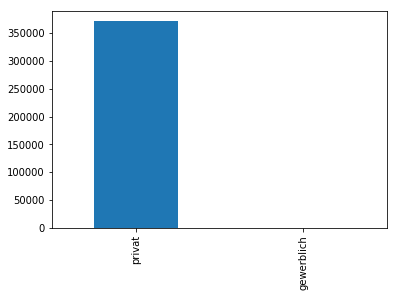

In [9]:
df['seller'].value_counts().plot.bar()

### <font color='blue'> one of the label only have 3 entries, so we drop it

In [10]:
df.drop(['seller'], axis=1,inplace=True)

## Look at the offerType variable

In [11]:
df["offerType"].value_counts()

Angebot    371516
Gesuch         12
Name: offerType, dtype: int64

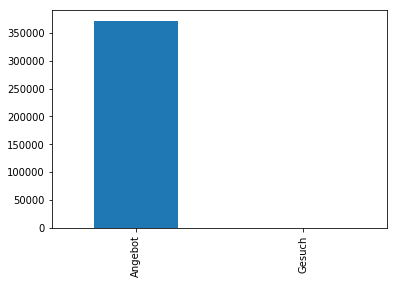

In [12]:
df['offerType'].value_counts().plot.bar()

### <font color='blue'> one of the label only have 12 entries, so we drop it

In [13]:
df.drop(['offerType'], axis=1,inplace=True)

## Look at the nrOfPictures variable

In [14]:
df["nrOfPictures"].value_counts()

0    371528
Name: nrOfPictures, dtype: int64

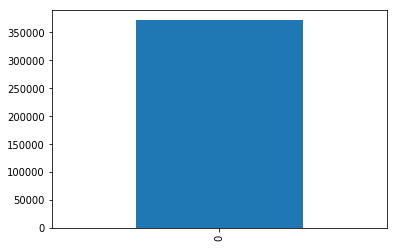

In [15]:
df['nrOfPictures'].value_counts().plot.bar()

### <font color='blue'> It only have one label, so we drop it

In [16]:
df.drop(['nrOfPictures'], axis=1,inplace=True)

## Look at the abtest variable

In [17]:
df["abtest"].value_counts()
# keep it

test       192585
control    178943
Name: abtest, dtype: int64

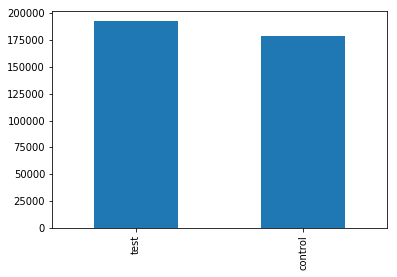

In [18]:
df['abtest'].value_counts().plot.bar()

### <font color='blue'> Both labels are quite even, so we keep it

## Look at the dateCrawled, dateCreated, lastSeen variable

In [19]:
df[ ["dateCrawled","dateCreated","lastSeen"] ].head()

,dateCrawled,dateCreated,lastSeen
0,2016-03-24 11:52:17,2016-03-24 00:00:00,2016-04-07 03:16:57
1,2016-03-24 10:58:45,2016-03-24 00:00:00,2016-04-07 01:46:50
2,2016-03-14 12:52:21,2016-03-14 00:00:00,2016-04-05 12:47:46
3,2016-03-17 16:54:04,2016-03-17 00:00:00,2016-03-17 17:40:17
4,2016-03-31 17:25:20,2016-03-31 00:00:00,2016-04-06 10:17:21


### <font color='blue'> These three variable are just dates, we don't need dates for our regressions

In [20]:
df = df.drop(["dateCrawled","dateCreated","lastSeen"] , axis=1 )

## Look at the postalCode variable

In [21]:
df["postalCode"].head()

0    70435
1    66954
2    90480
3    91074
4    60437
Name: postalCode, dtype: int64

### <font color='blue'> We don't need postcode for our regressions

In [22]:
df.drop(['postalCode'], axis=1,inplace=True)

## Look at the name variable

In [23]:
df["name"].value_counts().head()

Ford_Fiesta            657
BMW_318i               627
Opel_Corsa             622
Volkswagen_Golf_1.4    603
BMW_316i               523
Name: name, dtype: int64

### <font color='blue'> It's the nome of the cars, we don't need it, so we drop it

In [24]:
df.drop(['name'], axis=1,inplace=True)

# Deal with missing value

In [25]:
df.isnull().sum()
# 5 variable contain missing value

price                      0
abtest                     0
vehicleType            37869
yearOfRegistration         0
gearbox                20209
powerPS                    0
model                  20484
kilometer                  0
monthOfRegistration        0
fuelType               33386
brand                      0
notRepairedDamage      72060
dtype: int64

### Filling missing value for gearbox variable

In [26]:
df.groupby("brand")["gearbox"].value_counts()

brand           gearbox  
alfa_romeo      manuell       2064
                automatik      146
audi            manuell      20841
                automatik    10698
bmw             manuell      25323
                automatik    13442
chevrolet       manuell       1104
                automatik      634
chrysler        automatik      753
                manuell        637
citroen         manuell       4304
                automatik      604
dacia           manuell        877
                automatik        1
daewoo          manuell        475
                automatik       33
daihatsu        manuell        667
                automatik       85
fiat            manuell       8786
                automatik      231
ford            manuell      22198
                automatik     1953
honda           manuell       2393
                automatik      318
hyundai         manuell       3091
                automatik      421
jaguar          automatik      477
                manuell      

In [27]:
gearbox = df["gearbox"].unique()
brand = df["brand"].unique()
d = {}

for i in brand :
    m = 0
    for j in gearbox :
        if df[(df.gearbox == j) & (df.brand == i)].shape[0] > m :
            m = df[(df.gearbox == j) & (df.brand == i)].shape[0]
            d[i] = j

In [28]:
for i in brand :
    df.loc[(df.brand == i) & (df.gearbox.isnull()) ,"gearbox" ] = d[i]

In [29]:
df["gearbox"].isnull().sum()

0

### <font color='blue'> use most frequent label to fill Na

### Filling missing value for notRepairedDamage variable

In [30]:
df["notRepairedDamage"].value_counts()

nein    263182
ja       36286
Name: notRepairedDamage, dtype: int64

In [31]:
df["notRepairedDamage"].fillna("nein",inplace = True)

### Filling missing value for fuelType variable

In [32]:
df["fuelType"].value_counts()

benzin     223857
diesel     107746
lpg          5378
cng           571
hybrid        278
andere        208
elektro       104
Name: fuelType, dtype: int64

In [33]:
df["fuelType"].fillna("benzin",inplace = True)

In [34]:
df["fuelType"].isnull().sum()

0

### <font color='blue'>use fuelType to fill out missing vehicltype (same fueltype more likely to have same vehicle type)

### Filling missing value for vehicleType variable

In [35]:
df["vehicleType"].value_counts()

limousine     95894
kleinwagen    80023
kombi         67564
bus           30201
cabrio        22898
coupe         19015
suv           14707
andere         3357
Name: vehicleType, dtype: int64

In [36]:
df.groupby("fuelType")["vehicleType"].value_counts()

fuelType  vehicleType
andere    limousine         51
          andere            44
          kleinwagen        29
          kombi             25
          bus               10
          suv                9
          cabrio             6
          coupe              3
benzin    kleinwagen     72531
          limousine      66300
          kombi          31350
          cabrio         20769
          coupe          15935
          bus            10795
          suv             5400
          andere          1786
cng       bus              240
          kombi            136
          kleinwagen        80
          limousine         40
          andere            14
          suv                4
          cabrio             3
          coupe              3
diesel    kombi          34848
          limousine      27648
          bus            18622
          suv             8665
          kleinwagen      6808
          coupe           2737
          cabrio          1871
          andere 

In [37]:
vehicleType = df["vehicleType"].unique()
fuelType = df["fuelType"].unique()
print(fuelType)
print(vehicleType)
 
vehicleType = np.delete(vehicleType,0)

['benzin' 'diesel' 'lpg' 'andere' 'hybrid' 'cng' 'elektro']
[nan 'coupe' 'suv' 'kleinwagen' 'limousine' 'cabrio' 'bus' 'kombi'
 'andere']


In [38]:
d = {}
for i in fuelType :
    m = 0
    for j in vehicleType :
        if df[(df.vehicleType == j) & (df.fuelType == i)].shape[0] > m :
            m = df[(df.vehicleType == j) & (df.fuelType == i)].shape[0]
            d[i] = j

In [39]:
for i in fuelType :
    df.loc[(df.fuelType == i) & (df.vehicleType.isnull()) ,"vehicleType" ] = d[i]

In [40]:
df["vehicleType"].isnull().sum()

0

### drop model
We already have the brand feature, these 2 variable are highly correlate so we droped it

In [41]:
df.drop(['model'], axis=1,inplace=True)

## remove outlier

In [42]:
df["yearOfRegistration"].describe()

count    371528.000000
mean       2004.577997
std          92.866598
min        1000.000000
25%        1999.000000
50%        2003.000000
75%        2008.000000
max        9999.000000
Name: yearOfRegistration, dtype: float64

In [43]:
df[df.yearOfRegistration > 2017].shape

(4134, 11)

In [44]:
df[df.yearOfRegistration < 1950].shape

(289, 11)

### <font color='blue'> So only 289 registration are there before 1950 and 4000 registration after 2017 , so these are outliers and should be removed for better results

In [45]:
df = df[(df.yearOfRegistration < 2017)  & (df.yearOfRegistration > 1950)]

In [46]:
# now lets look at the price
df["price"].describe()

count    3.565370e+05
mean     1.739899e+04
std      3.658497e+06
min      0.000000e+00
25%      1.150000e+03
50%      2.999000e+03
75%      7.400000e+03
max      2.147484e+09
Name: price, dtype: float64

### <font color='blue'> price starts from 0 and goes upto max 2.147484e+09 , but the price 0 is unrealistic, so we drop those rows. Only 158 values are there above 2 lakh and 12000 enries below 100, lets remove them

In [47]:
df[df.price < 100].shape

(12372, 11)

In [48]:
df[df.price > 200000].shape
#only 158 values are there above 2 lakh and 12000 enries below 100, lets remove them

(158, 11)

In [49]:
df = df[(df.price > 100) & (df.price < 200000) ]

In [50]:
df.shape

(342990, 11)

## Data transformation

In [51]:
from sklearn.preprocessing import LabelEncoder

In [52]:
data = df.copy()

In [53]:
data["vehicleType"] =LabelEncoder().fit_transform(data["vehicleType"])
data["fuelType"] =LabelEncoder().fit_transform(data["fuelType"])
data["gearbox"] =LabelEncoder().fit_transform(data["gearbox"])
data["notRepairedDamage"] =LabelEncoder().fit_transform(data["notRepairedDamage"])
data["brand"] =LabelEncoder().fit_transform(data["brand"])
data["abtest"] =LabelEncoder().fit_transform(data["abtest"])

## Train Test Split

In [54]:
np.random.seed(123)
y  = data["price"]
x =  data.drop("price",axis=1)

In [55]:
x_train, x_test, y_train, y_test = train_test_split(x, y, random_state = 0)

In [56]:
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
x_train = ss.fit_transform(x_train)
x_test = ss.transform(x_test)

## Small set, for some model that too time consumming

In [57]:
np.random.seed(123)
y  = data["price"]
x =  data.drop("price",axis=1)

_, sample_X, _, sample_y = train_test_split(x, y, shuffle = False, test_size = 0.01)
print(sample_X.shape,sample_y.shape)

small_x_train, small_x_test, small_y_train, small_y_test=train_test_split(sample_X, sample_y, test_size=0.25, random_state=0)

(3430, 10) (3430,)


In [58]:
print(small_x_train.shape)
print(small_y_train.shape)

print(small_x_test.shape)
print(small_y_test.shape)

(2572, 10)
(2572,)
(858, 10)
(858,)


## Bagging RF

In [66]:
from sklearn.ensemble import BaggingRegressor
from sklearn.linear_model import LinearRegression

lr_clf = RandomForestRegressor(n_estimators=100)
bag_clf = BaggingRegressor(lr_clf, n_estimators=500, max_samples=100, bootstrap=True, random_state=0, oob_score=True)

bag_clf.fit(small_x_train, small_y_train)
y_pred = bag_clf.predict(small_x_test)
print('Train score: {:.4f}'.format(bag_clf.score(small_x_train, small_y_train)))
print('Test score: {:.4f}'.format(bag_clf.score(small_x_test, small_y_test)))

BaggingRegressor(base_estimator=RandomForestRegressor(bootstrap=True,
                                                      criterion='mse',
                                                      max_depth=None,
                                                      max_features='auto',
                                                      max_leaf_nodes=None,
                                                      min_impurity_decrease=0.0,
                                                      min_impurity_split=None,
                                                      min_samples_leaf=1,
                                                      min_samples_split=2,
                                                      min_weight_fraction_leaf=0.0,
                                                      n_estimators=100,
                                                      n_jobs=None,
                                                      oob_score=False,
                                    

Train score: 0.6058
Test score: 0.5827


## Bagging KNN regression

In [67]:
from sklearn.neighbors import KNeighborsRegressor
knn_reg = KNeighborsRegressor(7)
bag_reg = BaggingRegressor(knn_reg, n_estimators=500, max_samples=100, bootstrap=True, random_state=0, oob_score=True)

bag_reg.fit(small_x_train, small_y_train)
y_pred = bag_reg.predict(small_x_test)
print('Train score: {:.4f}'.format(bag_reg.score(small_x_train, small_y_train)))
print('Test score: {:.4f}'.format(bag_reg.score(small_x_test, small_y_test)))

BaggingRegressor(base_estimator=KNeighborsRegressor(algorithm='auto',
                                                    leaf_size=30,
                                                    metric='minkowski',
                                                    metric_params=None,
                                                    n_jobs=None, n_neighbors=7,
                                                    p=2, weights='uniform'),
                 bootstrap=True, bootstrap_features=False, max_features=1.0,
                 max_samples=100, n_estimators=500, n_jobs=None, oob_score=True,
                 random_state=0, verbose=0, warm_start=False)

Train score: 0.3214
Test score: 0.2675


## Pasting RF

In [209]:
#bootsrap = false

from sklearn.ensemble import BaggingRegressor
from sklearn.linear_model import LinearRegression

lr_clf = RandomForestRegressor(n_estimators=100)
bag_clf = BaggingRegressor(lr_clf, n_estimators=500, max_samples=100, bootstrap=False, random_state=0)

bag_clf.fit(x_train, y_train)
y_pred = bag_clf.predict(x_test)
print('Train score: {:.4f}'.format(bag_clf.score(x_train, y_train)))
print('Test score: {:.4f}'.format(bag_clf.score(x_test, y_test)))

BaggingRegressor(base_estimator=RandomForestRegressor(bootstrap=True,
                                                      criterion='mse',
                                                      max_depth=None,
                                                      max_features='auto',
                                                      max_leaf_nodes=None,
                                                      min_impurity_decrease=0.0,
                                                      min_impurity_split=None,
                                                      min_samples_leaf=1,
                                                      min_samples_split=2,
                                                      min_weight_fraction_leaf=0.0,
                                                      n_estimators=100,
                                                      n_jobs=None,
                                                      oob_score=False,
                                    

Train score: 0.5756
Test score: 0.5516


## Pasting KNN regression

In [210]:
#bootsrap = false

knn_reg = KNeighborsRegressor(7)
bag_reg = BaggingRegressor(knn_reg, n_estimators=500, max_samples=100, bootstrap=False, random_state=0)

bag_reg.fit(x_train, y_train)
y_pred = bag_reg.predict(x_test)
print('Train score: {:.4f}'.format(bag_reg.score(x_train, y_train)))
print('Test score: {:.4f}'.format(bag_reg.score(x_test, y_test)))

BaggingRegressor(base_estimator=KNeighborsRegressor(algorithm='auto',
                                                    leaf_size=30,
                                                    metric='minkowski',
                                                    metric_params=None,
                                                    n_jobs=None, n_neighbors=7,
                                                    p=2, weights='uniform'),
                 bootstrap=False, bootstrap_features=False, max_features=1.0,
                 max_samples=100, n_estimators=500, n_jobs=None,
                 oob_score=False, random_state=0, verbose=0, warm_start=False)

Train score: 0.3342
Test score: 0.3185


## Gradient Boosting

## Fixed n_estimators

In [217]:
from  sklearn.ensemble import GradientBoostingRegressor

gbrt = GradientBoostingRegressor(max_depth=2, n_estimators=200, learning_rate=1.0, random_state=42)
gbrt.fit(x_train, y_train)
print("Accuracy on training set: {:.4f}".format(gbrt.score(x_train, y_train)))
print("Accuracy on test set: {:.4f}".format(gbrt.score(x_test, y_test)))

GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
                          learning_rate=1.0, loss='ls', max_depth=2,
                          max_features=None, max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=1, min_samples_split=2,
                          min_weight_fraction_leaf=0.0, n_estimators=200,
                          n_iter_no_change=None, presort='auto',
                          random_state=42, subsample=1.0, tol=0.0001,
                          validation_fraction=0.1, verbose=0, warm_start=False)

Accuracy on training set: 0.7983
Accuracy on test set: 0.7521


In [218]:
gbrt = GradientBoostingRegressor(max_depth=2, n_estimators=200, learning_rate=0.5, random_state=42)
gbrt.fit(x_train, y_train)
print("Accuracy on training set: {:.4f}".format(gbrt.score(x_train, y_train)))
print("Accuracy on test set: {:.4f}".format(gbrt.score(x_test, y_test)))

GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
                          learning_rate=0.5, loss='ls', max_depth=2,
                          max_features=None, max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=1, min_samples_split=2,
                          min_weight_fraction_leaf=0.0, n_estimators=200,
                          n_iter_no_change=None, presort='auto',
                          random_state=42, subsample=1.0, tol=0.0001,
                          validation_fraction=0.1, verbose=0, warm_start=False)

Accuracy on training set: 0.7934
Accuracy on test set: 0.7548


In [219]:
gbrt = GradientBoostingRegressor(max_depth=2, n_estimators=200, learning_rate=0.1, random_state=42)
gbrt.fit(x_train, y_train)
print("Accuracy on training set: {:.4f}".format(gbrt.score(x_train, y_train)))
print("Accuracy on test set: {:.4f}".format(gbrt.score(x_test, y_test)))

GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
                          learning_rate=0.1, loss='ls', max_depth=2,
                          max_features=None, max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=1, min_samples_split=2,
                          min_weight_fraction_leaf=0.0, n_estimators=200,
                          n_iter_no_change=None, presort='auto',
                          random_state=42, subsample=1.0, tol=0.0001,
                          validation_fraction=0.1, verbose=0, warm_start=False)

Accuracy on training set: 0.7513
Accuracy on test set: 0.7219


### <font color='blue'> learning rate = 0.5 has the best outcome

# Fixed Learning_rate

In [214]:
gbrt = GradientBoostingRegressor(max_depth=2, n_estimators=3, learning_rate=1.0, random_state=42)
gbrt.fit(x_train, y_train)
print("Accuracy on training set: {:.4f}".format(gbrt.score(x_train, y_train)))
print("Accuracy on test set: {:.4f}".format(gbrt.score(x_test, y_test)))

GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
                          learning_rate=1.0, loss='ls', max_depth=2,
                          max_features=None, max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=1, min_samples_split=2,
                          min_weight_fraction_leaf=0.0, n_estimators=3,
                          n_iter_no_change=None, presort='auto',
                          random_state=42, subsample=1.0, tol=0.0001,
                          validation_fraction=0.1, verbose=0, warm_start=False)

Accuracy on training set: 0.5406
Accuracy on test set: 0.5212


In [215]:
gbrt = GradientBoostingRegressor(max_depth=2, n_estimators=100, learning_rate=1.0, random_state=42)
gbrt.fit(x_train, y_train)
print("Accuracy on training set: {:.4f}".format(gbrt.score(x_train, y_train)))
print("Accuracy on test set: {:.4f}".format(gbrt.score(x_test, y_test)))

GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
                          learning_rate=1.0, loss='ls', max_depth=2,
                          max_features=None, max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=1, min_samples_split=2,
                          min_weight_fraction_leaf=0.0, n_estimators=100,
                          n_iter_no_change=None, presort='auto',
                          random_state=42, subsample=1.0, tol=0.0001,
                          validation_fraction=0.1, verbose=0, warm_start=False)

Accuracy on training set: 0.7785
Accuracy on test set: 0.7399


In [216]:
gbrt = GradientBoostingRegressor(max_depth=2, n_estimators=200, learning_rate=1.0, random_state=42)
gbrt.fit(x_train, y_train)
print("Accuracy on training set: {:.4f}".format(gbrt.score(x_train, y_train)))
print("Accuracy on test set: {:.4f}".format(gbrt.score(x_test, y_test)))

GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
                          learning_rate=1.0, loss='ls', max_depth=2,
                          max_features=None, max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=1, min_samples_split=2,
                          min_weight_fraction_leaf=0.0, n_estimators=200,
                          n_iter_no_change=None, presort='auto',
                          random_state=42, subsample=1.0, tol=0.0001,
                          validation_fraction=0.1, verbose=0, warm_start=False)

Accuracy on training set: 0.7983
Accuracy on test set: 0.7521


## <font color='blue'> 200 estimators has better result

## Adaboosting

In [68]:
# AdaBoost for KNN Regression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import AdaBoostRegressor
knn_reg = KNeighborsRegressor(7)
ada_knn_reg = AdaBoostRegressor(knn_reg, random_state=0)
ada_knn_reg.fit(small_x_train, small_y_train)

AdaBoostRegressor(base_estimator=KNeighborsRegressor(algorithm='auto',
                                                     leaf_size=30,
                                                     metric='minkowski',
                                                     metric_params=None,
                                                     n_jobs=None, n_neighbors=7,
                                                     p=2, weights='uniform'),
                  learning_rate=1.0, loss='linear', n_estimators=50,
                  random_state=0)

In [73]:
print("AdaBoost for KNN Regression:")
print('Accuracy score: {:.4f}'.format(ada_knn_reg.score(small_x_test, small_y_test)))

AdaBoost for KNN Regression:
Accuracy score: 0.3893


In [76]:
# AdaBoost for Linear Regression
lr_reg = LinearRegression()
ada_lr_reg = AdaBoostRegressor(lr_reg, random_state=0)
ada_lr_reg.fit(x_train, y_train)
y_pred = ada_lr_reg.predict(x_test)
print("AdaBoost for Linear Regression:")
print('Accuracy score: {:.4f}'.format(ada_lr_reg.score(x_test, y_test)))

AdaBoostRegressor(base_estimator=LinearRegression(copy_X=True,
                                                  fit_intercept=True,
                                                  n_jobs=None,
                                                  normalize=False),
                  learning_rate=1.0, loss='linear', n_estimators=50,
                  random_state=0)

AdaBoost for Linear Regression:
Accuracy score: 0.1643


### <font color = 'blue'> Adaboost for KNN is better than Linear Regression

# PCA

In [65]:
score_table = pd.DataFrame([], columns = ['Model', 'Train_score','Test_score','PCA_test'])

In [59]:
from sklearn.decomposition import PCA

pca = PCA(n_components=0.95)
X_reduced = pca.fit_transform(x_train)
X_test_reduced = pca.transform(x_test)

print("Explained variance ratio:",np.sum(pca.explained_variance_ratio_))
print("X_reduced shape:",X_reduced.shape)
print("n_components:",pca.n_components_)

Explained variance ratio: 0.9999999999999997
X_reduced shape: (257242, 10)
n_components: 10


## PCA Linear Regression

In [94]:
from sklearn.linear_model import LinearRegression
lreg = LinearRegression()
lreg.fit(X_reduced, y_train)
print('Train_PCA R-sq:',lreg.score(X_reduced, y_train))
print('Test_PCA R-sq',lreg.score(X_test_reduced, y_test))

temp=pd.DataFrame([["linear_reg_pca",lreg.score(X_reduced, y_train),lreg.score(X_test_reduced, y_test),None]], columns = ['Model', 'Train_score','Test_score','PCA_test'])
score_table=score_table.append(temp,ignore_index=True)

lreg = LinearRegression()
lreg.fit(small_x_train, small_y_train)
print('Train R-sq:',lreg.score(small_x_train, small_y_train))
print('Test R-sq',lreg.score(small_x_test, small_y_test))

temp=pd.DataFrame([["linear_reg",lreg.score(small_x_train, small_y_train),lreg.score(small_x_test, small_y_test),None]], columns = ['Model', 'Train_score','Test_score','PCA_test'])
score_table=score_table.append(temp,ignore_index=True)


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

Train_PCA R-sq: 0.337577091941236
Test_PCA R-sq 0.31996406364790286


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

Train R-sq: 0.4727494840275216
Test R-sq 0.48777951083750537


## PCA Ridge

In [ ]:
from sklearn.linear_model import Ridge

In [95]:
ridge_reg = Ridge(alpha=100, random_state=0)
ridge_reg.fit(X_reduced, y_train)
print('Train_PCA R-sq:',ridge_reg.score(X_reduced, y_train))
print('Test_PCA R-sq',ridge_reg.score(X_test_reduced, y_test))

temp=pd.DataFrame([["ridge_reg_pca",ridge_reg.score(X_reduced, y_train),ridge_reg.score(X_test_reduced, y_test),None]], columns = ['Model', 'Train_score','Test_score','PCA_test'])
score_table=score_table.append(temp,ignore_index=True)

ridge_reg = Ridge(alpha=100, random_state=0)
ridge_reg.fit(small_x_train, small_y_train)
print('Train small score:',ridge_reg.score(small_x_train, small_y_train))
print('Test small score',ridge_reg.score(small_x_test, small_y_test))

temp=pd.DataFrame([["ridge_reg",ridge_reg.score(small_x_train, small_y_train),ridge_reg.score(small_x_test,small_y_test),None]], columns = ['Model', 'Train_score','Test_score','PCA_test'])
score_table=score_table.append(temp,ignore_index=True)


Ridge(alpha=100, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=0, solver='auto', tol=0.001)

Train_PCA R-sq: 0.3375770615750562
Test_PCA R-sq 0.31996353808267974


Ridge(alpha=100, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=0, solver='auto', tol=0.001)

Train small score: 0.4714328568620486
Test small score 0.48825747638866557


## PCA KNN 

In [89]:
from sklearn.neighbors import KNeighborsRegressor

knn_reg = KNeighborsRegressor(3)
knn_reg.fit(X_reduced, y_train)
print('Train_PCA R-sq:',knn_reg.score(X_reduced, y_train))
print('Test_PCA R-sq',knn_reg.score(X_test_reduced, y_test))

knn_reg = KNeighborsRegressor(3)
knn_reg.fit(small_x_train, small_y_train)
print('Train R-sq:',knn_reg.score(small_x_train, small_y_train))
print('Test R-sq',knn_reg.score(small_x_test, small_y_test))

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
                    metric_params=None, n_jobs=None, n_neighbors=3, p=2,
                    weights='uniform')

Train_PCA R-sq: 0.8728574106762056
Test_PCA R-sq 0.708875866682346


KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
                    metric_params=None, n_jobs=None, n_neighbors=3, p=2,
                    weights='uniform')

Train R-sq: 0.7606403597185619
Test R-sq 0.474404947163662


In [96]:
temp=pd.DataFrame([["knn_reg_pca",knn_reg.score(X_reduced, y_train),knn_reg.score(X_test_reduced, y_test),None]], columns = ['Model', 'Train_score','Test_score','PCA_test'])
score_table=score_table.append(temp,ignore_index=True)

temp=pd.DataFrame([["knn_reg",knn_reg.score(small_x_train, small_y_train),knn_reg.score(small_x_test,small_y_test),None]], columns = ['Model', 'Train_score','Test_score','PCA_test'])
score_table=score_table.append(temp,ignore_index=True)

In [97]:
score_table

,Model,Train_score,Test_score,PCA_test
0,linear_reg_pca,0.337577,0.319964,None
1,linear_reg_pca,0.337577,0.319964,None
2,linear_reg,0.472749,0.487780,None
3,ridge_reg_pca,0.337577,0.319964,None
4,ridge_reg,0.471433,0.488257,None
5,knn_reg_pca,-1.865627,-1.736097,None
6,knn_reg,0.760640,0.474405,None


## PCA Lasso

In [98]:
from sklearn.linear_model import Lasso

In [99]:
lasso_reg = Lasso(alpha=100, random_state=0)
lasso_reg.fit(X_reduced, y_train)
print('Train_PCA R-sq:',lasso_reg.score(X_reduced, y_train))
print('Test_PCA R-sq',lasso_reg.score(X_test_reduced, y_test))

temp=pd.DataFrame([["lasso_reg_pca",lasso_reg.score(X_reduced, y_train),lasso_reg.score(X_test_reduced, y_test),None]], columns = ['Model', 'Train_score','Test_score','PCA_test'])
score_table=score_table.append(temp,ignore_index=True)

lasso_reg = Lasso(alpha=100, random_state=0)
lasso_reg.fit(small_x_train, small_y_train)
print('Train small score:',lasso_reg.score(small_x_train, small_y_train))
print('Test small score',lasso_reg.score(small_x_test, small_y_test))

temp=pd.DataFrame([["lasso_reg",lasso_reg.score(small_x_train, small_y_train),lasso_reg.score(small_x_test, small_y_test),None]], columns = ['Model', 'Train_score','Test_score','PCA_test'])
score_table=score_table.append(temp,ignore_index=True)

Lasso(alpha=100, copy_X=True, fit_intercept=True, max_iter=1000,
      normalize=False, positive=False, precompute=False, random_state=0,
      selection='cyclic', tol=0.0001, warm_start=False)

Train_PCA R-sq: 0.3363102009590776
Test_PCA R-sq 0.3184414858653406


Lasso(alpha=100, copy_X=True, fit_intercept=True, max_iter=1000,
      normalize=False, positive=False, precompute=False, random_state=0,
      selection='cyclic', tol=0.0001, warm_start=False)

Train small score: 0.46899758861443797
Test small score 0.4869850618430981


In [100]:
score_table

,Model,Train_score,Test_score,PCA_test
0,linear_reg_pca,0.337577,0.319964,None
1,linear_reg_pca,0.337577,0.319964,None
2,linear_reg,0.472749,0.487780,None
3,ridge_reg_pca,0.337577,0.319964,None
4,ridge_reg,0.471433,0.488257,None
5,knn_reg_pca,-1.865627,-1.736097,None
6,knn_reg,0.760640,0.474405,None
7,lasso_reg_pca,0.336310,0.318441,None
8,lasso_reg,0.468998,0.486985,None


## PCA Polynomial Regression

In [104]:
from  sklearn.preprocessing  import PolynomialFeatures
train_score_list = []
test_score_list = []

for n in range(1,3):

    poly = PolynomialFeatures(n)#put data into higher power
    X_train_poly = poly.fit_transform(small_x_train)
    X_test_poly = poly.transform(small_x_test)
    lreg.fit(X_train_poly, small_y_train)
    train_score_list.append(lreg.score(X_train_poly, small_y_train))
    test_score_list.append(lreg.score(X_test_poly, small_y_test))

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [105]:
pca=PCA(n_components=0.95)
X_train_poly_pca = pca.fit_transform(X_train_poly)
X_test_poly_pca = pca.transform(X_test_poly)

In [112]:
lreg=LinearRegression()
lreg.fit(X_train_poly_pca, small_y_train)
print('Train_PCA R-sq:',lreg.score(X_train_poly_pca, small_y_train))
print('Test_PCA R-sq',lreg.score(X_test_poly_pca, small_y_test))

temp=pd.DataFrame([["poly_reg_pca",lreg.score(X_train_poly_pca, small_y_train),lreg.score(X_test_poly_pca, small_y_test),None]], columns = ['Model', 'Train_score','Test_score','PCA_test'])
score_table=score_table.append(temp,ignore_index=True)

lreg.fit(X_train_poly, small_y_train)
print('Train small score:',lreg.score(X_train_poly, small_y_train))
print('Test small score',lreg.score(X_test_poly, small_y_test))

temp=pd.DataFrame([["poly_reg",lreg.score(X_train_poly, small_y_train),lreg.score(X_test_poly, small_y_test),None]], columns = ['Model', 'Train_score','Test_score','PCA_test'])
score_table=score_table.append(temp,ignore_index=True)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

Train_PCA R-sq: 0.1851994176047138
Test_PCA R-sq 0.12280887964612175


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

Train small score: 0.6605715807989154
Test small score 0.6043668566810096


## PCA decision tree

In [115]:
tree = DecisionTreeRegressor(max_depth=2)
tree.fit(X_reduced, y_train)
print('Train_PCA R-sq:',tree.score(X_reduced, y_train))
print('Test_PCA R-sq:',tree.score(X_test_reduced, y_test))

temp=pd.DataFrame([["tree_reg_pca",tree.score(X_reduced, y_train),tree.score(X_test_reduced, y_test),None]], columns = ['Model', 'Train_score','Test_score','PCA_test'])
score_table=score_table.append(temp,ignore_index=True)

tree.fit(small_x_train, small_y_train)
print('Train R-sq:',tree.score(small_x_train, small_y_train))
print('Test R-sq:',tree.score(small_x_test, small_y_test))

temp=pd.DataFrame([["tree_reg",tree.score(small_x_train, small_y_train),tree.score(small_x_test, small_y_test),None]], columns = ['Model', 'Train_score','Test_score','PCA_test'])
score_table=score_table.append(temp,ignore_index=True)

DecisionTreeRegressor(criterion='mse', max_depth=2, max_features=None,
                      max_leaf_nodes=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      presort=False, random_state=None, splitter='best')

Train_PCA R-sq: 0.2994920506830555
Test_PCA R-sq: 0.28247429721312967


DecisionTreeRegressor(criterion='mse', max_depth=2, max_features=None,
                      max_leaf_nodes=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      presort=False, random_state=None, splitter='best')

Train R-sq: 0.4290532538282983
Test R-sq: 0.4012181632388758


## PCA different SVR

In [60]:
from sklearn.svm import LinearSVR
from sklearn.svm import SVR

In [61]:
C = 0.1
L_svr = LinearSVR(C=C)
ksvr_L = SVR(kernel='linear', C=C)
ksvr_rbf = SVR(kernel='rbf', gamma=0.1, C=C)
ksvr_poly = SVR(kernel='poly', degree=2, C=C)

In [67]:
L_svr.fit(X_reduced,y_train)
ksvr_L.fit(X_reduced,y_train)
ksvr_rbf.fit(X_reduced,y_train)
ksvr_poly.fit(X_reduced,y_train)

print('Linear_SVR train_pca score: ',L_svr.score(X_reduced, y_train))
print('Linear_SVR test_pca score: ',L_svr.score(X_test_reduced, y_test))

temp=pd.DataFrame([["Linear_SVR_reg_pca",L_svr.score(X_reduced, y_train),L_svr.score(X_test_reduced, y_test),None]], columns = ['Model', 'Train_score','Test_score','PCA_test'])
score_table=score_table.append(temp,ignore_index=True)

print('Kernel_SVR_Linear train_pca score: ',ksvr_L.score(X_reduced, y_train))
print('Kernel_SVR_Linear test_pca score: ',ksvr_L.score(X_test_reduced, y_test))

temp=pd.DataFrame([["Kernel_SVR_Linear",ksvr_L.score(X_reduced, y_train),ksvr_L.score(X_test_reduced, y_test),None]], columns = ['Model', 'Train_score','Test_score','PCA_test'])
score_table=score_table.append(temp,ignore_index=True)

print('Kernel_SVR_rbf train_pca score: ',ksvr_rbf.score(X_reduced, y_train))
print('Kernel_SVR_rbf test_pca score: ',ksvr_rbf.score(X_test_reduced, y_test))

temp=pd.DataFrame([["Kernel_SVR_rbf",ksvr_rbf.score(X_reduced, y_train),ksvr_rbf.score(X_test_reduced, y_test),None]], columns = ['Model', 'Train_score','Test_score','PCA_test'])
score_table=score_table.append(temp,ignore_index=True)

print('Kernel_SVR_poly train_pca score: ',ksvr_poly.score(X_reduced, y_train))
print('Kernel_SVR_poly test_pca score: ',ksvr_poly.score(X_test_reduced, y_test))

temp=pd.DataFrame([["Kernel_SVR_poly",ksvr_poly.score(X_reduced, y_train),ksvr_poly.score(X_test_reduced, y_test),None]], columns = ['Model', 'Train_score','Test_score','PCA_test'])
score_table=score_table.append(temp,ignore_index=True)

Linear_SVR train_pca score:  -0.28789072349731804
Linear_SVR test_pca score:  -0.22365166341876086
Kernel_SVR_Linear train_pca score:  0.149033140055724
Kernel_SVR_Linear test_pca score:  0.15455504227610872
Kernel_SVR_rbf train_pca score:  -0.10232968374411167
Kernel_SVR_rbf test_pca score:  -0.08223177975415075
Kernel_SVR_poly train_pca score:  -0.053624643633725544
Kernel_SVR_poly test_pca score:  -0.0015985232844144546


In [64]:
L_svr.fit(small_x_train,small_y_train)

C:\Users\howar\Anaconda3\lib\site-packages\sklearn\svm\base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


LinearSVR(C=0.1, dual=True, epsilon=0.0, fit_intercept=True,
          intercept_scaling=1.0, loss='epsilon_insensitive', max_iter=1000,
          random_state=None, tol=0.0001, verbose=0)

In [65]:
print('Linear_SVR train score: ',L_svr.score(small_x_train, small_y_train))
print('Linear_SVR test score: ',L_svr.score(small_x_test, small_y_test))

Linear_SVR train score:  0.33252618613284624
Linear_SVR test score:  0.4394771243221597


In [62]:
import numpy as np
np.random.seed(123)
y  = data["price"]
x =  data.drop("price",axis=1)
x = data[['price', 'yearOfRegistration', 'powerPS', 'kilometer', 'monthOfRegistration']]

_, sample_X, _, sample_y = train_test_split(x, y, shuffle = False, test_size = 0.01)
print(sample_X.shape,sample_y.shape)

svr_x_train, svr_x_test, svr_y_train, svr_y_test=train_test_split(sample_X, sample_y, test_size=0.25, random_state=0)

(3430, 5) (3430,)


In [63]:
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
svr_x_train = ss.fit_transform(svr_x_train)
svr_x_test = ss.transform(svr_x_test)

In [64]:
ksvr_L.fit(svr_x_train,svr_y_train)
print('Kernel_SVR_Linear train score: ',ksvr_L.score(svr_x_train, svr_y_train))
print('Kernel_SVR_Linear test score: ',ksvr_L.score(svr_x_test, svr_y_test))

Kernel_SVR_Linear train score:  -0.05151737781162269
Kernel_SVR_Linear test score:  -0.061975216137118316


In [65]:
ksvr_rbf.fit(svr_x_train,svr_y_train)
print('Kernel_SVR_rbf train score: ',ksvr_rbf.score(svr_x_train, svr_y_train))
print('Kernel_SVR_rbf test score: ',ksvr_rbf.score(svr_x_test, svr_y_test))

Kernel_SVR_rbf train score:  -0.1236715704010316
Kernel_SVR_rbf test score:  -0.13512308419220975


In [66]:
ksvr_poly.fit(svr_x_train,svr_y_train)
print('Kernel_SVR_poly train score: ',ksvr_poly.score(svr_x_train, svr_y_train))
print('Kernel_SVR_poly test score: ',ksvr_poly.score(svr_x_test, svr_y_test))

Kernel_SVR_poly train score:  -0.1131247805590474
Kernel_SVR_poly test score:  -0.12074931348726525


### <font color = 'blue'> 1. Linear SVR is still better than other SVR

### <font color = 'blue'> 2. KNN is the best model with or without PCA

### <font color = 'blue'> 3. PCA's outcome is not better than reducing rows 

## Deep Learning

In [70]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation
from keras.optimizers import SGD
from keras.utils import np_utils

np.random.seed(123)

Using TensorFlow backend.


In [71]:
# step 1: build the model, container
model = Sequential()
model.add(Dense(100, input_dim = small_x_train.shape[1], activation='sigmoid')) #hidden
model.add(Dense(50, input_dim = 60, activation='relu')) #hidden
model.add(Dense(5, input_dim = 10, activation='relu')) #hidden
model.add(Dense(1)) #output

In [72]:
# step 2: compile the model, computational graph
model.compile(loss='mse' , optimizer='Adagrad' , metrics = ['MSE'])

In [73]:
# step 3: train the model
model.fit(small_x_train, small_y_train, batch_size= 5, epochs=50)

Train on 2572 samples
Epoch 1/50
2572/2572 [==============================] - 1s 287us/sample - loss: 86715605.8740 - MSE: 86715560.0000
Epoch 2/50
2572/2572 [==============================] - 1s 241us/sample - loss: 86676492.8162 - MSE: 86676528.0000
Epoch 3/50
2572/2572 [==============================] - 1s 225us/sample - loss: 86638892.2959 - MSE: 86638928.0000
Epoch 4/50
2572/2572 [==============================] - 1s 228us/sample - loss: 86599903.5091 - MSE: 86599872.0000
Epoch 5/50
2572/2572 [==============================] - 1s 227us/sample - loss: 86557396.1401 - MSE: 86557408.0000
Epoch 6/50
2572/2572 [==============================] - 1s 231us/sample - loss: 86511516.9020 - MSE: 86511528.0000
Epoch 7/50
2572/2572 [==============================] - 1s 242us/sample - loss: 86464503.1286 - MSE: 86464504.0000
Epoch 8/50
2572/2572 [==============================] - 1s 235us/sample - loss: 86416083.8425 - MSE: 86416088.0000
Epoch 9/50
2572/2572 [==============================] - 1s

In [74]:
# step 4: evalution
loss_and_metrics = model.evaluate(small_x_train, small_y_train)
train_r_sq=1-(loss_and_metrics[1]*len(small_y_train))/(sum((small_y_train-small_y_train.mean())*(small_y_train-small_y_train.mean())))

loss_and_metrics = model.evaluate(small_x_test, small_y_test)
test_r_sq=1-(loss_and_metrics[1]*len(small_y_test))/(sum((small_y_test-small_y_test.mean())*(small_y_test-small_y_test.mean())))
print("Test Loss", loss_and_metrics[0])
print("Test MSE", loss_and_metrics[1])

858/858 [==============================] - 0s 24us/sample - loss: 99326501.4452 - MSE: 99326512.0000
Test Loss 99326501.44522144
Test MSE 99326510.0


### <font color = 'blue'>Test Loss = 99326501.44522144, Test MSE = 99326510.0

## Split into small dataset

### <font color ='blue'>Some models are to computing consuming we ran hours still couldn't get results. So we split into smaller dataset

In [128]:
np.random.seed(123)
y  = data["price"]
x =  data.drop("price",axis=1)

_, sample_X, _, sample_y = train_test_split(x, y, shuffle = False, test_size = 0.01)
print(sample_X.shape,sample_y.shape)

small_x_train, small_x_test, small_y_train, small_y_test=train_test_split(sample_X, sample_y, test_size=0.25, random_state=0)

(3430, 10) (3430,)


In [129]:
print(small_x_train.shape)
print(small_y_train.shape)

print(small_x_test.shape)
print(small_y_test.shape)

(2572, 10)
(2572,)
(858, 10)
(858,)


## RandomForestRegressor

In [130]:
# classifier
rfr = RandomForestRegressor()
rfr.fit(x_train, y_train)
print(rfr.score(x_train, y_train))
print(rfr.score(x_test, y_test))


C:\Users\howar\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=10,
                      n_jobs=None, oob_score=False, random_state=None,
                      verbose=0, warm_start=False)

0.9617249369470943
0.7952935486349149


### <font color = "blue">The train score is 0.9617249369470943, and the test score is 0.7952935486349149

## Linear Regression

In [131]:
from sklearn.linear_model import LinearRegression

In [132]:
lr = LinearRegression()
lr.fit(x_train, y_train)
print(lr.score(x_train, y_train))
print(lr.score(x_test, y_test))

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

0.3375770919412362
0.3199640636479021


## Polynomial Regression

### <font color = 'blue'> We use small set here because it just can't finish running

In [133]:
from sklearn.preprocessing import PolynomialFeatures

In [134]:
poly = PolynomialFeatures(4)
s = poly.fit_transform(small_x_train, small_y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

[0.47274948402752137, 0.6605715807989154, 0.7547384464082166, 0.7902819366848757]
[0.48777951083752547, 0.6043668566810096, 0.6387219041310335, 0.46242151335317727]


Text(0.5, 0, 'degree')

Text(0, 0.5, 'accuracy')

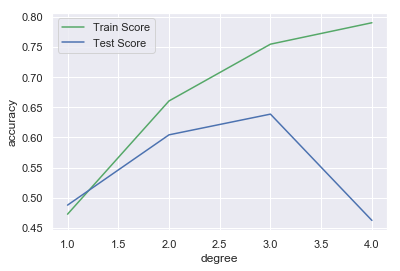

In [135]:
train_score_list = []
test_score_list = []

for n in range(1,5):
    poly = PolynomialFeatures(n)
    X_train_poly = poly.fit_transform(small_x_train)
    X_test_poly = poly.transform(small_x_test)
    lr.fit(X_train_poly, small_y_train)
    train_score_list.append(lr.score(X_train_poly, small_y_train))
    test_score_list.append(lr.score(X_test_poly, small_y_test))
    
print(train_score_list)
print(test_score_list)

%matplotlib inline

x_axis = range(1,5)
plt.plot(x_axis, train_score_list, c = 'g', label = 'Train Score')
plt.plot(x_axis, test_score_list, c = 'b', label = 'Test Score')
plt.xlabel('degree')
plt.ylabel('accuracy')
plt.legend()

## <font color = 'blue'> We can see from the graph, the best degree should be 3, because it has both highest train and test scores. The train score is 0.7547384464082166, test score is 0.6387219041310335.

### degree of 3 has the best outcome

## Ridge Regression with Grid Search

In [136]:
from sklearn.linear_model import Ridge

In [137]:
ridgereg = Ridge(alpha=0.01,random_state = 0, max_iter=10000)
ridge = ridgereg.fit(x_train, y_train)
print("Training set score: {:.4f}".format(ridge.score(x_train, y_train))) 
print("Test set score: {:.4f}".format(ridge.score(x_test, y_test))) 


Training set score: 0.3376
Test set score: 0.3200


In [138]:
x_range = [0.01, 0.1, 1, 10, 100]
train_score_list = []
test_score_list = []

for alpha in x_range: 
    ridge = Ridge(alpha)
    ridge.fit(x_train,y_train)
    train_score_list.append(ridge.score(x_train,y_train))
    test_score_list.append(ridge.score(x_test, y_test))

Ridge(alpha=0.01, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=None, solver='auto', tol=0.001)

Ridge(alpha=0.1, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=None, solver='auto', tol=0.001)

Ridge(alpha=1, copy_X=True, fit_intercept=True, max_iter=None, normalize=False,
      random_state=None, solver='auto', tol=0.001)

Ridge(alpha=10, copy_X=True, fit_intercept=True, max_iter=None, normalize=False,
      random_state=None, solver='auto', tol=0.001)

Ridge(alpha=100, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=None, solver='auto', tol=0.001)

Text(0.5, 0, '$\\alpha$')

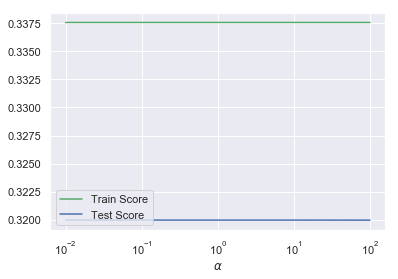

In [139]:
plt.plot(x_range, train_score_list, c = 'g', label = 'Train Score')
plt.plot(x_range, test_score_list, c = 'b', label = 'Test Score')
plt.xscale('log')
plt.legend(loc = 3)
plt.xlabel(r'$\alpha$')

In [140]:
best_score = 0

x_range = [0.001, 0.01, 0.1, 1, 10,100]
for alpha in x_range: 
    ridge = Ridge(alpha)
    ridge.fit(x_train,y_train)
    score = ridge.score(x_train, y_train)
    if score > best_score:
        best_score = score
        best_parameters = {'alpha':alpha}
        
ridge = Ridge(**best_parameters)
ridge.fit(x_train, y_train)
test_score = ridge.score(x_test, y_test)

print("Best score on train set: {:.4f}".format(best_score))
print("Best parameters: ", best_parameters)
print("Test set score with best parameters: {:.4f}".format(test_score))

Ridge(alpha=0.001, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=None, solver='auto', tol=0.001)

Ridge(alpha=0.01, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=None, solver='auto', tol=0.001)

Ridge(alpha=0.1, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=None, solver='auto', tol=0.001)

Ridge(alpha=1, copy_X=True, fit_intercept=True, max_iter=None, normalize=False,
      random_state=None, solver='auto', tol=0.001)

Ridge(alpha=10, copy_X=True, fit_intercept=True, max_iter=None, normalize=False,
      random_state=None, solver='auto', tol=0.001)

Ridge(alpha=100, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=None, solver='auto', tol=0.001)

Ridge(alpha=0.001, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=None, solver='auto', tol=0.001)

Best score on train set: 0.3376
Best parameters:  {'alpha': 0.001}
Test set score with best parameters: 0.3200


## <font color = 'blue'> The best alpha of ridge is 0.001, and the best validation score is 0.3376

## Lasso Regression with Grid Search

In [141]:
from sklearn.linear_model import Lasso

In [142]:
lassoreg = Lasso(alpha=0.01,random_state = 0, max_iter=10000)
lasso = lassoreg.fit(x_train, y_train)
print("Training set score: {:.4f}".format(lasso.score(x_train, y_train))) 
print("Test set score: {:.4f}".format(lasso.score(x_test, y_test))) 
print("Number of features used: {}".format(np.sum(lasso.coef_ != 0)))

Training set score: 0.3376
Test set score: 0.3200
Number of features used: 10


In [143]:
x_range = [0.01, 0.1, 1, 10, 100]
train_score_list = []
test_score_list = []

for alpha in x_range: 
    lasso = Lasso(alpha)
    lasso.fit(x_train,y_train)
    train_score_list.append(lasso.score(x_train,y_train))
    test_score_list.append(lasso.score(x_test, y_test))

Lasso(alpha=0.01, copy_X=True, fit_intercept=True, max_iter=1000,
      normalize=False, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False)

Lasso(alpha=0.1, copy_X=True, fit_intercept=True, max_iter=1000,
      normalize=False, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False)

Lasso(alpha=1, copy_X=True, fit_intercept=True, max_iter=1000, normalize=False,
      positive=False, precompute=False, random_state=None, selection='cyclic',
      tol=0.0001, warm_start=False)

Lasso(alpha=10, copy_X=True, fit_intercept=True, max_iter=1000, normalize=False,
      positive=False, precompute=False, random_state=None, selection='cyclic',
      tol=0.0001, warm_start=False)

Lasso(alpha=100, copy_X=True, fit_intercept=True, max_iter=1000,
      normalize=False, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False)

Text(0.5, 0, '$\\alpha$')

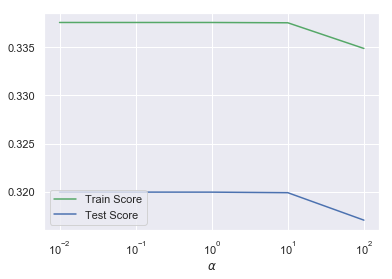

In [144]:
plt.plot(x_range, train_score_list, c = 'g', label = 'Train Score')
plt.plot(x_range, test_score_list, c = 'b', label = 'Test Score')
plt.xscale('log')
plt.legend(loc = 3)
plt.xlabel(r'$\alpha$')

In [145]:
best_score = 0

x_range = [0.001, 0.01, 0.1, 1, 10,100]
for alpha in x_range: 
    lasso = Lasso(alpha)
    lasso.fit(x_train,y_train)
    score = lasso.score(x_train, y_train)
    if score > best_score:
        best_score = score
        best_parameters = {'alpha':alpha}
        
lasso = Lasso(**best_parameters)
lasso.fit(x_train, y_train)
test_score = lasso.score(x_test, y_test)

print("Best score on validation set: {:.4f}".format(best_score))
print("Best parameters: ", best_parameters)
print("Test set score with best parameters: {:.4f}".format(test_score))

Lasso(alpha=0.001, copy_X=True, fit_intercept=True, max_iter=1000,
      normalize=False, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False)

Lasso(alpha=0.01, copy_X=True, fit_intercept=True, max_iter=1000,
      normalize=False, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False)

Lasso(alpha=0.1, copy_X=True, fit_intercept=True, max_iter=1000,
      normalize=False, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False)

Lasso(alpha=1, copy_X=True, fit_intercept=True, max_iter=1000, normalize=False,
      positive=False, precompute=False, random_state=None, selection='cyclic',
      tol=0.0001, warm_start=False)

Lasso(alpha=10, copy_X=True, fit_intercept=True, max_iter=1000, normalize=False,
      positive=False, precompute=False, random_state=None, selection='cyclic',
      tol=0.0001, warm_start=False)

Lasso(alpha=100, copy_X=True, fit_intercept=True, max_iter=1000,
      normalize=False, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False)

Lasso(alpha=0.001, copy_X=True, fit_intercept=True, max_iter=1000,
      normalize=False, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False)

Best score on validation set: 0.3376
Best parameters:  {'alpha': 0.001}
Test set score with best parameters: 0.3200


## <font color = 'blue'> The best alpha of lasso is 0.001, and the best validation score is 0.3376

## KNN Regressor

###  <font color='blue'> We can see from the graph, the best K might be 5

In [146]:
from sklearn.neighbors import KNeighborsRegressor

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
                    metric_params=None, n_jobs=None, n_neighbors=1, p=2,
                    weights='uniform')

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
                    metric_params=None, n_jobs=None, n_neighbors=2, p=2,
                    weights='uniform')

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
                    metric_params=None, n_jobs=None, n_neighbors=3, p=2,
                    weights='uniform')

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
                    metric_params=None, n_jobs=None, n_neighbors=4, p=2,
                    weights='uniform')

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
                    metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                    weights='uniform')

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
                    metric_params=None, n_jobs=None, n_neighbors=6, p=2,
                    weights='uniform')

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
                    metric_params=None, n_jobs=None, n_neighbors=7, p=2,
                    weights='uniform')

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
                    metric_params=None, n_jobs=None, n_neighbors=8, p=2,
                    weights='uniform')

Text(0.5, 0, 'k')

Text(0, 0.5, 'MSE')

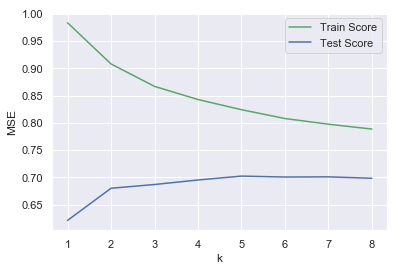

In [147]:
%matplotlib inline
train_score_array = []
test_score_array = []

for k in range(1,9):
    knn_reg = KNeighborsRegressor(k)
    knn_reg.fit(x_train, y_train)
    train_score_array.append(knn_reg.score(x_train, y_train))
    test_score_array.append(knn_reg.score(x_test, y_test))

x_axis = range(1,9)
plt.plot(x_axis, train_score_array, c = 'g', label = 'Train Score')
plt.plot(x_axis, test_score_array, c = 'b', label = 'Test Score')
plt.legend()
plt.xlabel('k')
plt.ylabel('MSE')

##  SVR linear

### <font color='blue'> We use svr as smaller dataset for only SVR related model, because it's too comuting consumming, it just coudn't finished running

In [148]:
numerical = []
for i in df.columns:
    if df[i].dtype!='O':
        numerical.append(i)
print(numerical)

['price', 'yearOfRegistration', 'powerPS', 'kilometer', 'monthOfRegistration']


In [149]:

np.random.seed(123)
y  = data["price"]
x =  data.drop("price",axis=1)
x = data[['price', 'yearOfRegistration', 'powerPS', 'kilometer', 'monthOfRegistration']]

_, sample_X, _, sample_y = train_test_split(x, y, shuffle = False, test_size = 0.01)
print(sample_X.shape,sample_y.shape)

svr_x_train, svr_x_test, svr_y_train, svr_y_test=train_test_split(sample_X, sample_y, test_size=0.25, random_state=0)

(3430, 5) (3430,)


In [150]:
from sklearn.svm import SVR

In [151]:
svr_linear = SVR(kernel='linear')
svr_linear.fit(svr_x_train,svr_y_train)

SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1,
    gamma='auto_deprecated', kernel='linear', max_iter=-1, shrinking=True,
    tol=0.001, verbose=False)

In [152]:
print("Training set score: {:.4f}".format(svr_linear.score(svr_x_train, svr_y_train))) 
print("Test set score: {:.4f}".format(svr_linear.score(svr_x_test, svr_y_test))) 

Training set score: 1.0000
Test set score: 1.0000


##  SVR rbf

In [153]:
svr_rbf = SVR(kernel='rbf')
svr_rbf.fit(svr_x_train,svr_y_train)

C:\Users\howar\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1,
    gamma='auto_deprecated', kernel='rbf', max_iter=-1, shrinking=True,
    tol=0.001, verbose=False)

In [154]:
print("Training set score: {:.4f}".format(svr_rbf.score(svr_x_train, svr_y_train))) 
print("Test set score: {:.4f}".format(svr_rbf.score(svr_x_test, svr_y_test))) 

Training set score: -0.1264
Test set score: -0.1376


# Cross Validation part

In [155]:
from sklearn.model_selection import cross_val_score

### Linear Regression CV score

In [156]:
lr_scores = cross_val_score(lr, x_train, y_train)
print("Linear Regression Cross-validation train scores: {}".format(lr_scores))
lr_scores = cross_val_score(lr, x_test, y_test)
print("Linear Regression Cross-validation train scores: {}".format(lr_scores))

C:\Users\howar\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


Linear Regression Cross-validation train scores: [0.3250177  0.33587557 0.34465932]
Linear Regression Cross-validation train scores: [0.31074259 0.33113527 0.31406198]


C:\Users\howar\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


In [157]:
scores = cross_val_score(lr, x_train, y_train, cv=5)
print("Average cross-validation train score: {:.4f}".format(scores.mean()))
scores = cross_val_score(lr, x_test, y_test, cv=5)
print("Average cross-validation test score: {:.4f}".format(scores.mean()))

Average cross-validation train score: 0.3365
Average cross-validation test score: 0.3196


### <font color='blue'> The avrage cv test score of linear regressin is 0.3196

### Polynomial Regression CV score

In [158]:
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import PolynomialFeatures

poly = PolynomialFeatures(degree=2)
X_ = poly.fit_transform(x_train)
X_test_ = poly.fit_transform(x_test)

In [159]:
# Instantiate
lg = LinearRegression()

# Fit
poly = lg.fit(X_, y_train)

# Obtain coefficients
lg.coef_


poly_scores = cross_val_score(poly, X_, y_train)
print("Polynomial Regression Cross-validation train scores: {}".format(poly_scores))
poly_scores = cross_val_score(poly, X_test_, y_test)
print("Polynomial Regression Cross-validation test scores: {}".format(poly_scores))

array([ 1.56014900e-01,  4.85615969e+03, -1.01902706e+05, -6.94401802e+04,
        1.87949318e+05, -7.08453761e+02,  4.87425848e+00, -2.21403893e+03,
       -2.29655392e+05,  4.18714110e+03, -1.98531126e+04,  4.85578628e+03,
       -7.61506866e+00, -4.70129573e+00, -8.81475899e+01, -1.01978784e+00,
       -4.49869563e-04,  3.01956972e+00, -2.35910738e+01, -1.18314553e+00,
        7.17588255e+01,  2.07431180e+02,  4.96190896e+01,  1.73259296e+02,
        5.31842350e-02,  5.28588830e-03, -3.18302808e+00,  1.00478939e+02,
       -9.12211970e-01, -2.68121479e+02,  1.74268879e+01, -1.90539053e+02,
        3.77437263e-01, -2.45328747e-03,  1.20641179e+00,  1.15113313e+02,
       -2.14018679e+00,  2.37231343e+01,  1.87949328e+05, -4.87792581e+00,
        3.47386645e-02,  4.73157448e+00, -1.03892268e+02,  2.54022199e+01,
       -1.28413243e+03, -2.17149626e-03, -5.99142295e-05, -3.46127205e-01,
       -1.07040697e+00, -2.65740965e-01,  1.58982589e+00, -1.48666004e-07,
       -3.52532028e-04, -

C:\Users\howar\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


Polynomial Regression Cross-validation train scores: [0.45497088 0.50725047 0.51323493]


C:\Users\howar\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


Polynomial Regression Cross-validation test scores: [0.51390624 0.06187818 0.48227664]


In [160]:
scores = cross_val_score(poly, X_, y_train, cv=5)
print("Average cross-validation train score: {:.4f}".format(scores.mean()))
scores = cross_val_score(poly, X_test_, y_test, cv=5)
print("Average cross-validation test score: {:.4f}".format(scores.mean()))

Average cross-validation train score: 0.5027
Average cross-validation test score: 0.3565


## <font color='blue'> The average cv test score of polynomial regression is 0.3565

### RIdge Regression CV score

In [161]:
ridge_scores = cross_val_score(ridgereg, x_train, y_train)
print("Ridge Regression Cross-validation train scores: {}".format(ridge_scores))
ridge_scores = cross_val_score(ridgereg, x_test, y_test)
print("Ridge Regression Cross-validation test scores: {}".format(ridge_scores))

C:\Users\howar\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


Ridge Regression Cross-validation train scores: [0.3250177  0.33587557 0.34465932]
Ridge Regression Cross-validation test scores: [0.31074259 0.33113527 0.31406198]


C:\Users\howar\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


In [162]:
scores = cross_val_score(ridgereg, x_train, y_train, cv=5)
print("Average cross-validation train score: {:.5f}".format(scores.mean()))
scores = cross_val_score(ridgereg, x_test, y_test, cv=5)
print("Average cross-validation test score: {:.5f}".format(scores.mean()))

Average cross-validation train score: 0.33648
Average cross-validation test score: 0.31957


### Lasso Regression CV score

In [163]:
lasso_scores = cross_val_score(lassoreg, x_train, y_train)
print("Lasso Regression Cross-validation train scores: {}".format(lasso_scores))
lasso_scores = cross_val_score(lassoreg, x_test, y_test)
print("Lasso Regression Cross-validation test scores: {}".format(lasso_scores))

C:\Users\howar\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


Lasso Regression Cross-validation train scores: [0.32501762 0.33587559 0.34465943]
Lasso Regression Cross-validation test scores: [0.3107426  0.33113524 0.31406202]


C:\Users\howar\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


In [164]:
scores = cross_val_score(lassoreg, x_train, y_train, cv=5)
print("Average cross-validation train score: {:.5f}".format(scores.mean()))
scores = cross_val_score(lassoreg, x_test, y_test, cv=5)
print("Average cross-validation test score: {:.5f}".format(scores.mean()))

Average cross-validation train score: 0.33648
Average cross-validation test score: 0.31957


## <font color="blue"> Both lasso and ridge regression's CV test scores are 0.32

### KNN Regression CV score

In [165]:
knn_reg_scores = cross_val_score(KNeighborsRegressor(7), x_train, y_train)
print("KNN Regression Cross-validation scores: {}".format(knn_reg_scores))
knn_reg_scores = cross_val_score(KNeighborsRegressor(7), x_train, y_train)
print("KNN Regression Cross-validation scores: {}".format(knn_reg_scores))

C:\Users\howar\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


KNN Regression Cross-validation scores: [0.72312019 0.69834555 0.70102602]


C:\Users\howar\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


KNN Regression Cross-validation scores: [0.72312019 0.69834555 0.70102602]


In [166]:
scores = cross_val_score(KNeighborsRegressor(7), x_train, y_train, cv=5)
print("Average cross-validation train score: {:.5f}".format(scores.mean()))
scores = cross_val_score(KNeighborsRegressor(7), x_test, y_test, cv=5)
print("Average cross-validation test score: {:.5f}".format(scores.mean()))

Average cross-validation train score: 0.70988
Average cross-validation test score: 0.63563


## SVR_linear CV score 

In [167]:
from sklearn.model_selection import cross_val_score

In [168]:
svr_linear_scores = cross_val_score(svr_linear, svr_x_train, svr_y_train)
print("SVR Linear Regression Cross-validation train scores: {}".format(svr_linear_scores))
svr_linear_scores = cross_val_score(svr_linear, svr_x_test, svr_y_test)
print("SVR Linear Regression Cross-validation test scores: {}".format(svr_linear_scores))

C:\Users\howar\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


SVR Linear Regression Cross-validation train scores: [1. 1. 1.]


C:\Users\howar\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


SVR Linear Regression Cross-validation test scores: [1. 1. 1.]


## SVR_rbf CV score

In [170]:
svr_rbf_scores = cross_val_score(svr_rbf, svr_x_train, svr_y_train)
print("SVR rbf Regression Cross-validation train scores: {}".format(svr_rbf_scores))
svr_rbf_scores = cross_val_score(svr_rbf, svr_x_test, svr_y_test)
print("SVR rbf Regression Cross-validation test scores: {}".format(svr_rbf_scores))

C:\Users\howar\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)
C:\Users\howar\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\howar\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\howar\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto'

SVR rbf Regression Cross-validation train scores: [-0.10974835 -0.15956346 -0.12447411]
SVR rbf Regression Cross-validation test scores: [-0.07527923 -0.1065231  -0.14433834]


C:\Users\howar\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)
C:\Users\howar\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\howar\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\howar\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto'

## Conclusion

Choose random forest regressor because it has the hightest test and train scores.

## <font color='green'> We can see that the best model is random forest regression, the second is KNN regression with cross validation, the third is polynomial regression with cross validation; ridge and lasso don't have much different, linear regression is the worst; SVR models can't compare because the sample size are not the same as other models.